In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq3
import UCSC_spec_db_interaction as UCSC_db
import sys
import os
import scipy.signal
from astropy.io import fits
from dust_extinction.parameter_averages import F99
import astropy.units as u
import pandas as pd
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Query Database for a specific host and grab apertures with physical size

In [ ]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/UCSC_spec_database/UCSC_spec_db')
#ran:
# test_query = "SELECT * from SPECTRA where OBJECT like '%15cge%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15pr%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15mg%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17gav%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%18jh%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16-efw%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17gfl%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hlt%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%18kl%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hmf%' and FILENAME like '%combined-20180611%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where FILENAME like '%17dzg%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16ez%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17jxd%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and AP_SIZE < 2 and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15pn%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15mt%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%17hoo%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD) and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16cuv%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15cfn%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where FILENAME like '%16cvc%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16dnp%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16bwu%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%CSS161013%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16grz%' and FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"
# test_query = "SELECT * from SPECTRA where FILENAME like '%combined%' and (AP_UNIT = 'kpc' or IS_KRON_RAD)"

# test_query = "SELECT * from SPECTRA where OBJECT like '%15cge%' and FILENAME like '%combined%' and AP_UNIT = 'kpc' and AP_SIZE=3 and FILENAME not like '%_SN%'"
# test_query = "SELECT * from SPECTRA where OBJECT like '%15pn%' and FILENAME like '%combined%' and IS_KRON_RAD"
# test_query = "SELECT * from SPECTRA where OBJECT like '%16dnp%' and FILENAME like '%combined%' and IS_KRON_RAD"

test_query = "SELECT * from SPECTRA where OBJECT like '%15fa%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15hg%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15jt%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15la%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15lu%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15mi%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15nr%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15so%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%16av%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%16lg%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%16cpu%' and FILENAME like '%combined%' and FILENAME not like '%_SN.fits%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15bdr%' and FILENAME like '%combined%' and FILENAME not like '%_SN%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%15zn%' and FILENAME like '%combined%' and FILENAME not like '%_SN%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%16cqa%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%16el%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%PSNJ0859349%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%PSNJ1602512%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA where OBJECT like '%PSNJ1628383%' and FILENAME like '%combined%'"
test_query = "SELECT * from SPECTRA"


spectra = UCSC_db.query_and_plot(test_query)

ASASSN15pr-red-20180711_ap4_1.5_kpc_SN.fits
PS15cge-blue-20180711_ap2_1.0_kpc_SN_BAD.fits
2017hmf-combined-20180711_ap3_1.5_kpc.fits
2017hmf-combined-20180711_ap2_1.0_kpc_SN_BAD.fits
2017hmf-red-20180711_ap1_1.0_kpc_BAD.fits
PS15cge-combined-20180711_ap4_1.5_kpc_SN_BAD.fits
PS15cge-red-20180711_ap12_1.5_arcsec_SN.fits
ASASSN15pr-red-20180711_ap13_3.0_arcsec.fits
2017hmf-blue-20180711_ap7_1.0_arcsec.fits
PS15cge-combined-20180711_ap11_1.5_arcsec.fits
ASASSN15pr-red-20180711_ap1_1.0_kpc.fits
2017hmf-red-20180711_ap12_4.25_rkron.fits
ASASSN15pr-blue-20180711_ap1_1.0_kpc.fits
2017hmf-combined-20180711_ap5_2.0_kpc.fits
2017hmf-blue-20180711_ap10_2.0_arcsec.fits
ASASSN15pr-blue-20180711_ap7_1.0_arcsec.fits
2018dfy-red-20180711_ap1.fits
2018cow-red-20180711_ap1.fits
ASASSN15pr-combined-20180711_ap8_1.0_arcsec_SN.fits
PS15cge-combined-20180711_ap1_1.0_kpc_BAD.fits
PS15cge-red-20180711_ap4_1.5_kpc_SN_BAD.fits
2018dfy-combined-20180711_ap1.fits
PS15cge-blue-20180711_ap8_3.0_kpc_SN.fits
PS15cge-r

Exception ignored in: <function WeakMethod.__new__.<locals>._cb at 0x1c7aa31400>
Traceback (most recent call last):
  File "/Users/msiebert/anaconda3/lib/python3.7/weakref.py", line 51, in _cb
    def _cb(arg):
KeyboardInterrupt


KeyboardInterrupt: 

# Get MW dust and correct spectra using Rv = 3.1 (doing in firefly now)

In [232]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from python import firefly_dust
# sn_dust = {}
# for spec in spectra:
#     if spec.meta_dict['OBJECT'] not in sn_dust:
#         ebv_mw = firefly_dust.get_dust_radec(spec.meta_dict['RA'],spec.meta_dict['DEC'],'ebv')
#         sn_dust[spec.meta_dict['OBJECT']] = ebv_mw
#         print (spec.meta_dict['OBJECT'], ebv_mw)
# ext = F99(Rv=3.1)
# for spec in spectra:
#     if spec.meta_dict['OBJECT'] in sn_dust:
#         print ('Correcting MW ext for', spec.meta_dict['FILENAME'])
#         spec.flux_dered_mw = spec.flux/ext.extinguish(spec.wavelength*u.AA, Av=3.1*sn_dust[spec.meta_dict['OBJECT']])
#         spec.err_dered_mw = spec.err/ext.extinguish(spec.wavelength*u.AA, Av=3.1*sn_dust[spec.meta_dict['OBJECT']])

# Take the largest aperture
# Estimate a pseudo continuum using a median filter
# Measure the Balmer decrement with gaussian line fitting

# Ignoring for now

In [233]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/nebular_fitting/')
import line_fitting_tools as tools

# for spec in spectra:
#     spec.wave_dered = spec.wavelength/(1.+z)
#     if 'rkron' in spec.meta_dict['FILENAME']:
#         flux_filt = scipy.signal.medfilt(spec.flux_dered_mw, kernel_size=41) #caveat: assuming no uncertainty here
#         neb_flux = spec.flux_dered_mw-flux_filt
#         mgaus_solved, w_range, fit_lines = tools.fit_galaxy([spec.wave_dered, neb_flux, 3.*spec.err_dered_mw])
#         h_ratio = mgaus_solved[2]['H_a_6562']/mgaus_solved[2]['H_b_4861']
#         ebv_gal = tools.calc_ebv_from_H_decrement(h_ratio)
#         tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [3650, 3800])
#         tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [4750, 5100])
#         tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [6500, 6800])
#         print (spec.meta_dict['FILENAME'], h_ratio, ebv_gal)
        

#         for line in fit_lines:
#             if line.parent_line is None:
#                 print (line.name)
#                 print ('Amplitude:', np.round(line.a,4))
#                 print ('Velocity (km/s):', np.round(line.vel,4))
#                 print ('Velocity width(km/s):', np.round(line.v_width,2))
#                 if line.skew != None:
#                     print ('Skewness width(km/s):', np.round(line.skew,2))
#                 else:
#                     print ('Skewness width(km/s):', ' None')
    

Fitting...


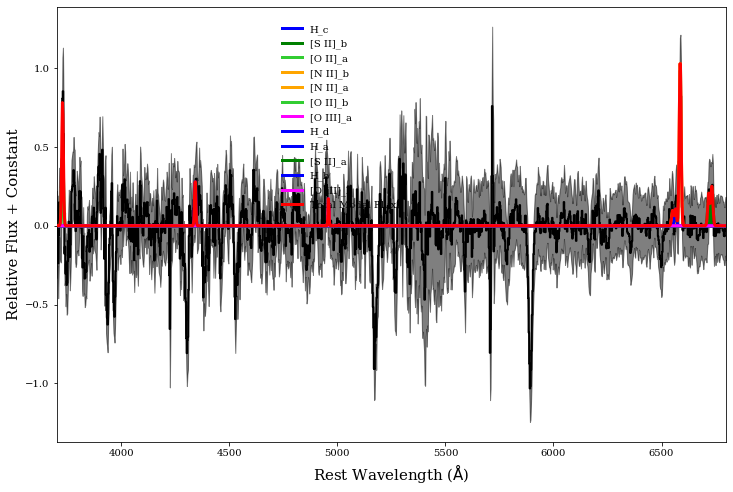

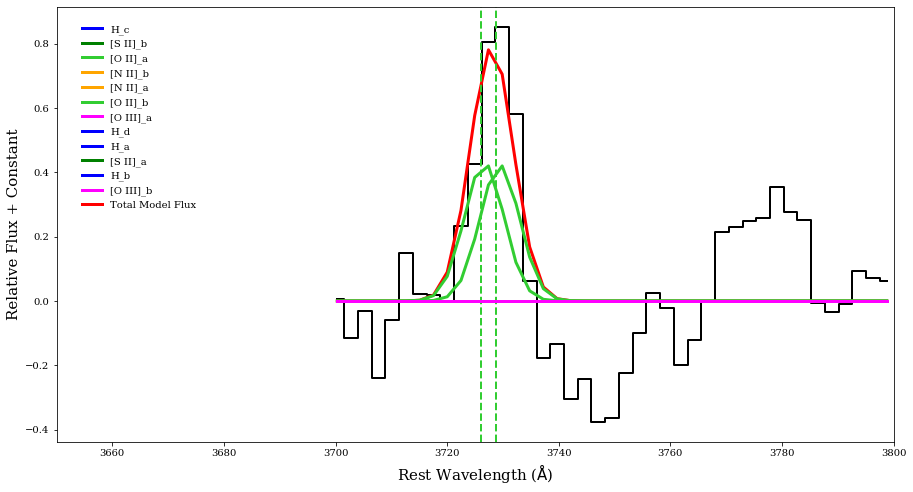

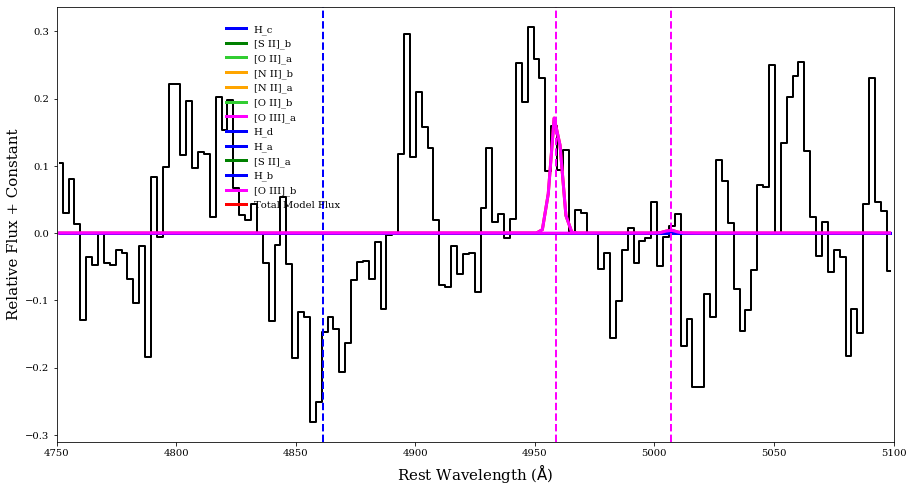

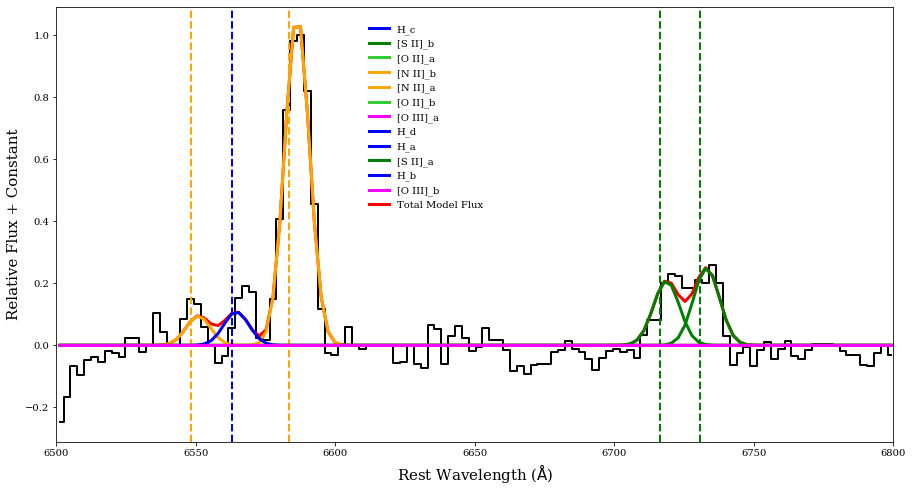

Fitting...


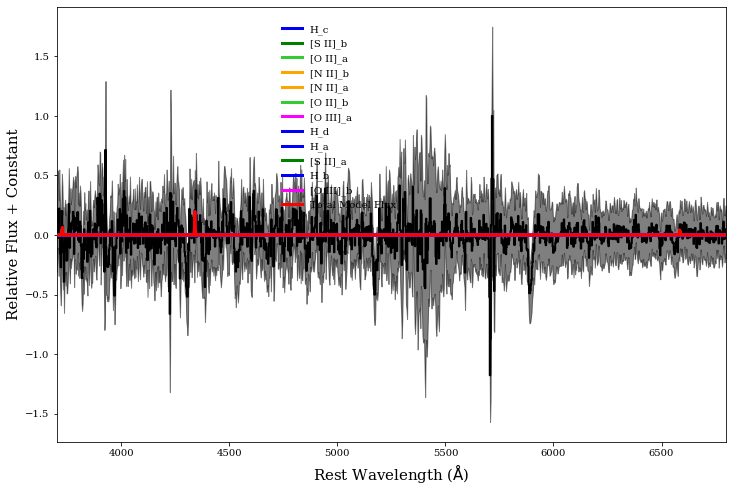

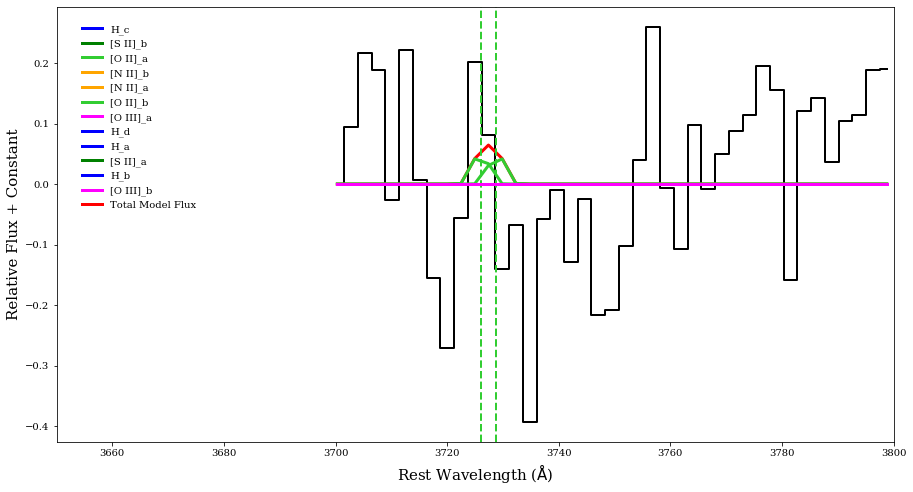

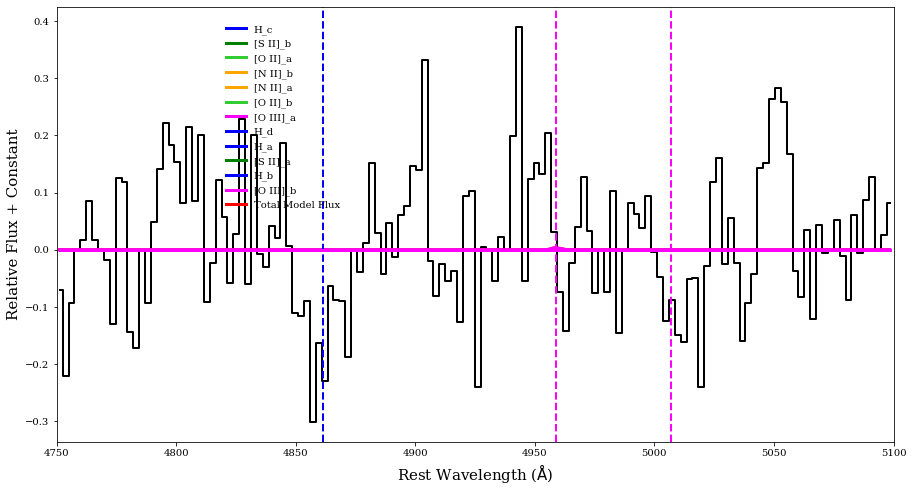

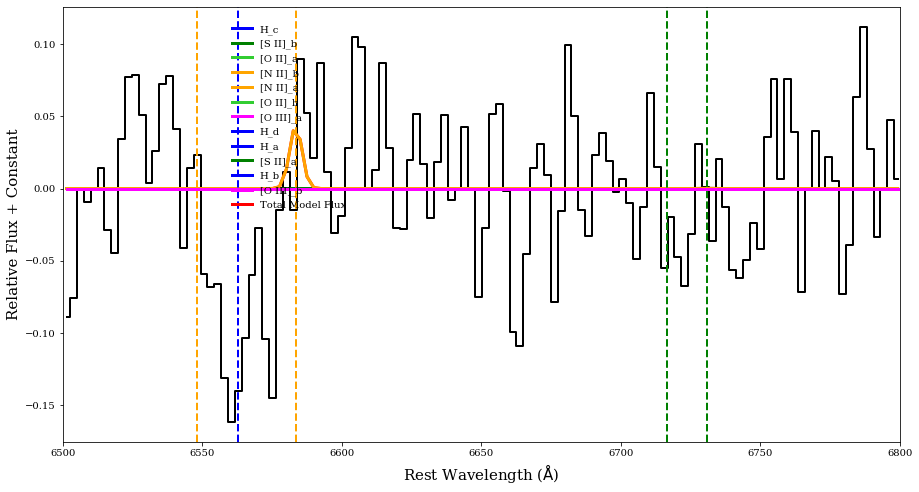

In [236]:
approx_z = 0.0311876

for spec in spectra:
    spec.wave_dered = spec.wavelength/(1.+approx_z)
#     if 'rkron' in spec.meta_dict['FILENAME']:
    if '3.0_kpc' in spec.meta_dict['FILENAME']:
        flux_filt = scipy.signal.medfilt(spec.flux, kernel_size=41) #caveat: assuming no uncertainty here
        neb_flux = spec.flux-flux_filt
        mgaus_solved, w_range, fit_lines = tools.fit_galaxy([spec.wave_dered, neb_flux, 3.*spec.err])
        tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [3650, 3800])
        tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [4750, 5100])
        tools.plot_fit(w_range, mgaus_solved[1], fit_lines, xlim = [6500, 6800])

In [237]:
# good_lines_for_z = ['[N II]_a', 'H_a',  '[O II]_a'] #one per element
# good_lines_for_z = ['[N II]_a', 'H_a',  '[O II]_a', '[S II]_a', '[O III]_a'] #one per element
# good_lines_for_z = ['[N II]_a', 'H_a',  '[S II]_a'] #one per element
# good_lines_for_z = ['[N II]_a', 'H_a',  '[S II]_a'] #one per element
# good_lines_for_z = ['[O II]_a', 'H_a'] #one per element
good_lines_for_z = ['[N II]_a', '[O II]_a'] #one per element
# good_lines_for_z = ['[O II]_a', '[N II]_a', '[S II]_a'] #one per element
# good_lines_for_z = [ 'H_a',  '[S II]_a', '[O III]_a', '[O II]_a'] #one per element
# good_lines_for_z = [ 'H_a',  '[S II]_a', '[O II]_a', '[N II]_a'] #one per element
# good_lines_for_z = []
z_array = []
for line in fit_lines:
    if line.parent_line is None:
        if line.name in good_lines_for_z:
            print (line.name) 
            print ('Amplitude:', np.round(line.a,4))
            print ('Velocity (km/s):', np.round(line.vel,4))
            print ('Velocity width(km/s):', np.round(line.v_width,2))
            center_wave = tools.calculate_wave_from_velocity(line.vel, line.rest_wave)
            print ('Center Wave (A):', center_wave*(1.+approx_z))
            real_z = (center_wave*(1.+approx_z)/line.rest_wave) - 1
            print ('Real z:', real_z)
            z_array.append(real_z)
if len(z_array) == 0:
    z = approx_z
else:
    z = np.average(z_array)
print ('Final z measurement for fitting: ', z)

[O II]_a
Amplitude: 0.0416
Velocity (km/s): -0.0038
Velocity width(km/s): 99.98
Center Wave (A): 3842.237947396486
Real z: 0.03118758706218472
[N II]_a
Amplitude: 0.0
Velocity (km/s): -0.0001
Velocity width(km/s): 100.0
Center Wave (A): 6752.267961967203
Real z: 0.031187599662067633
Final z measurement for fitting:  0.031187593362126176


-22.156914531596776 12.643500350952149
12.643500350952145
PSNJ1628383-combined-20170403_ap1_1.0_kpc.fits


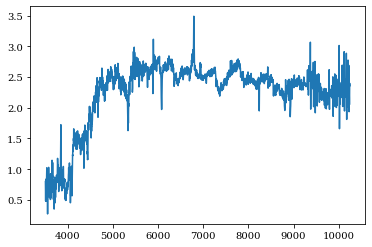

PSNJ1628383-combined-20170403_ap2_1.0_kpc_SN.fits


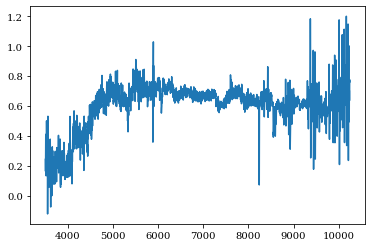

PSNJ1628383-combined-20170403_ap3_1.5_kpc.fits


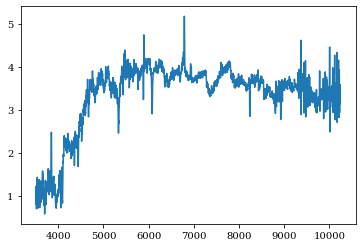

PSNJ1628383-combined-20170403_ap4_1.5_kpc_SN.fits


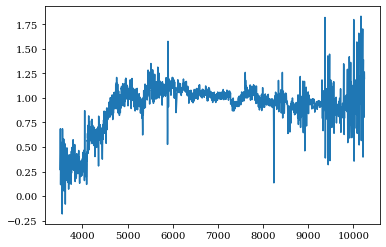

PSNJ1628383-combined-20170403_ap5_2.0_kpc.fits


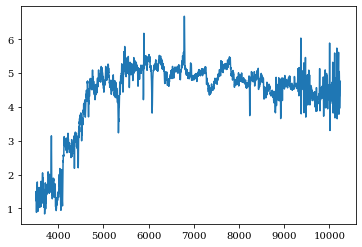

PSNJ1628383-combined-20170403_ap6_2.0_kpc_SN.fits


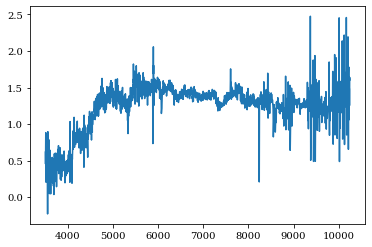

PSNJ1628383-combined-20170403_ap7_3.0_kpc.fits


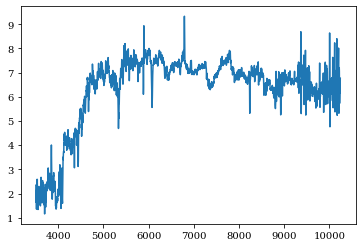

PSNJ1628383-combined-20170403_ap8_3.0_kpc_SN.fits


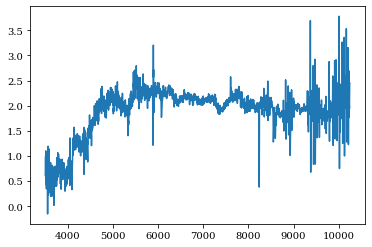

PSNJ1628383-combined-20170403_ap9_34.67_rkron.fits


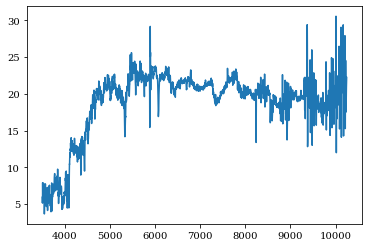

In [238]:
import pyphot
host_ps1_df = pd.read_csv('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/host_ps1_data.csv')
for spec in spectra:
#     if '3.0_kpc' in spec.meta_dict['FILENAME']:
    if 'rkron' in spec.meta_dict['FILENAME']:
        host_name = spec.meta_dict['FILENAME'].split('-')[0]
        if 'ASASSN' in host_name:
            host_name = 'ASASSN-'+host_name.split('ASASSN')[1].split('_')[0]
        if '_' in host_name:
            host_name = host_name.split('_')[0]
        if 'PTSS16' in host_name:
            host_name = 'PTSS-16efw'
        if 'SN2017hlt' in host_name:
            host_name = '2017hlt'
        if 'sn2018kl' in host_name:
            host_name = '2018kl'
        if 'AT2017hoo' in host_name:
            host_name = '2017hoo'
        host_ind = list(host_ps1_df['name'].values).index(host_name)
        r_int = host_ps1_df['rmag'][host_ind] - host_ps1_df['rext'][host_ind] #TODO:should use non-corrected?
        lib = pyphot.get_library()
        filt = 'SDSS_r'
        func = lib[filt]
        fflux = func.get_flux(spec.wavelength, spec.flux, axis = -1).value
        rmag = -2.5 * np.log10(fflux) - func.Vega_zero_mag
        print (rmag, r_int)
        r_diff = r_int - rmag
        scale = 10**(r_diff/(-2.5))
        fflux_new = func.get_flux(spec.wavelength, scale*spec.flux, axis = -1).value
        rmag_new = -2.5 * np.log10(fflux_new) - func.Vega_zero_mag
        print (rmag_new)
for spec in spectra:
    print (spec.meta_dict['FILENAME'])
    #firefly assumes flux units 10**(-15)
    spec.flux_scaled = scale*spec.flux/10**(-15)
    spec.err_scaled = scale*spec.err/10**(-15)
    plt.plot(spec.wavelength, spec.flux_scaled)
    plt.show()

# Correct for host galaxy extinction (for now maybe better to fit host extinction with firefly)

In [239]:
# for spec in spectra:
#     print ('Correcting for host ext of E(B-V):', ebv_gal) 
#     spec.flux_dered_mw_gal = spec.flux_dered_mw/ext.extinguish(spec.wave_dered*u.AA, Av=3.1*ebv_gal)
#     spec.err_dered_mw_gal = spec.err_dered_mw/ext.extinguish(spec.wave_dered*u.AA, Av=3.1*ebv_gal)
#     plt.plot(spec.wave_dered, spec.flux)
#     plt.plot(spec.wave_dered, spec.flux_dered_mw_gal)
#     plt.show()

# Fit stellar continuum using firefly (hpf_mode = 'on' , and milky_way_reddening = True)

In [240]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from run import firefly
from run import read_firefly

In [241]:
for spec in spectra:
    print (spec.meta_dict['FILENAME'], spec.meta_dict['OBJECT'])
#     firefly.main(spec.wavelength, spec.flux_scaled, spec.err_scaled, z, spec.meta_dict['RA'], 
#                  spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], 
#                  clobber=True)
    firefly.main(spec.wavelength, spec.flux_scaled, spec.err_scaled, z, spec.meta_dict['RA'], 
                 spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], 
                 clobber=False)
#     firefly.main(spec.wavelength, spec.flux_dered_mw_gal, spec.err_dered_mw_gal, z, spec.meta_dict['RA'], 
#                  spec.meta_dict['DEC'], vdisp=135.89957, res=5000, input_file = spec.meta_dict['FILENAME'].split('.fits')[0], clobber=False)
    

PSNJ1628383-combined-20170403_ap1_1.0_kpc.fits PSNJ1628383

Starting firefly ...

Output file:  /Users/msiebert/Documents/UCSC/Research/firefly_release/output/spFly-PSNJ1628383-combined-20170403_ap1_1.0_kpc.fits

getting the models, t= 1642630255.4044402
Corrects from dust attenuation and fitting, Dt= 20.202237844467163 seconds
dust done, Dt= 60.59556293487549 seconds
fitting done, Dt= 79.53295588493347 seconds
Gets the best model, Dt= 79.53313183784485 seconds

Done... total time: 82028 seconds.

PSNJ1628383-combined-20170403_ap2_1.0_kpc_SN.fits PSNJ1628383

Starting firefly ...

Output file:  /Users/msiebert/Documents/UCSC/Research/firefly_release/output/spFly-PSNJ1628383-combined-20170403_ap2_1.0_kpc_SN.fits

getting the models, t= 1642630337.089241
Corrects from dust attenuation and fitting, Dt= 19.679461002349854 seconds
dust done, Dt= 44.51916193962097 seconds
fitting done, Dt= 72.30359983444214 seconds
Gets the best model, Dt= 72.30373191833496 seconds

Done... total time: 82103

# Visualize continuum fits, remove large scale differences with median filter, save output to fits

PSNJ1628383-combined-20170403_ap1_1.0_kpc.fits
age: 8.33 Gyr
[Z/H]: -0.38 dex
log M/Msun: 10.48
E(B-V): 0.24 mag


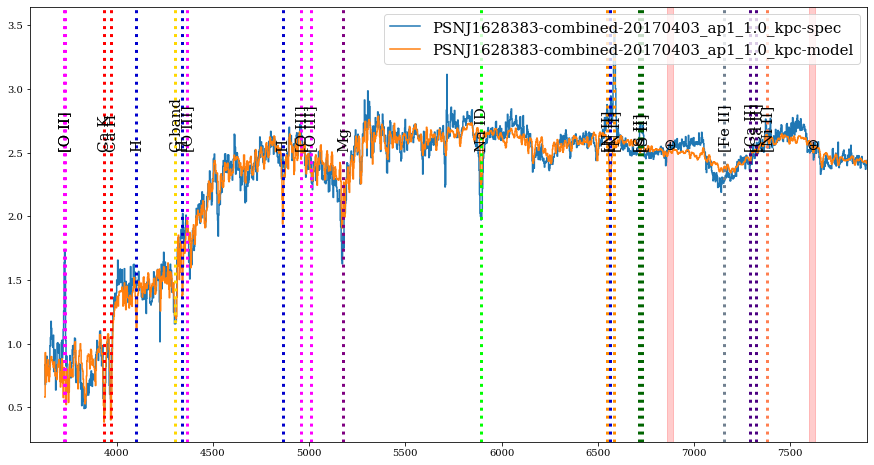

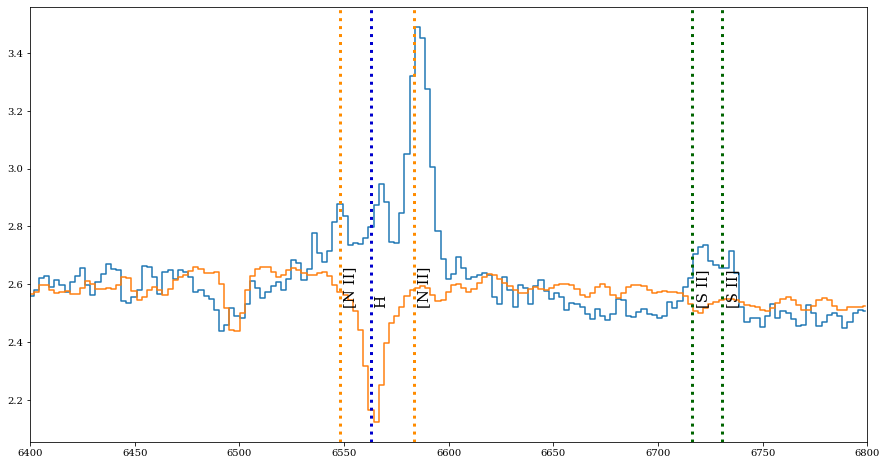

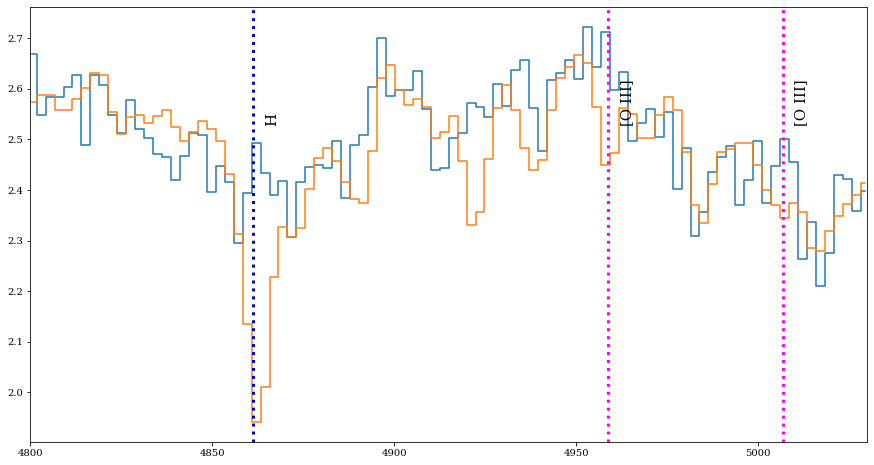

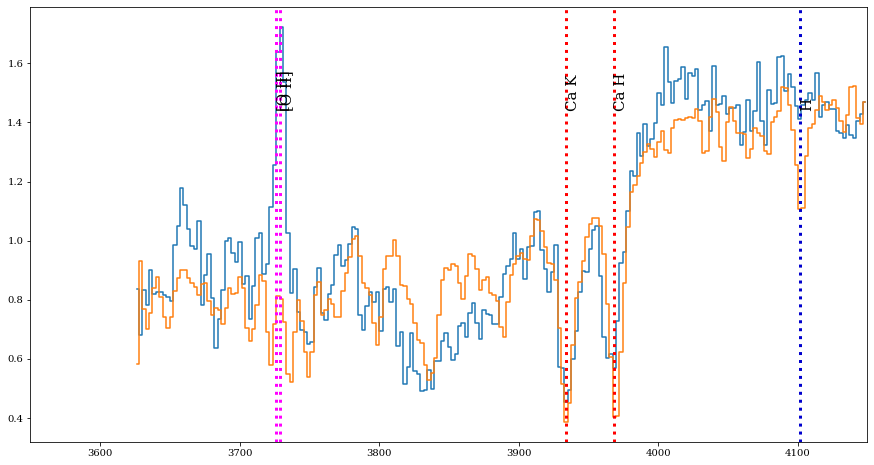

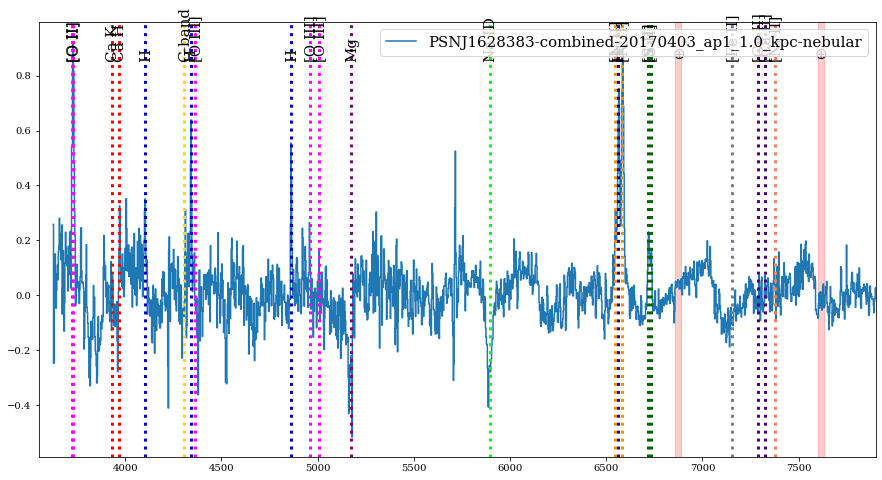

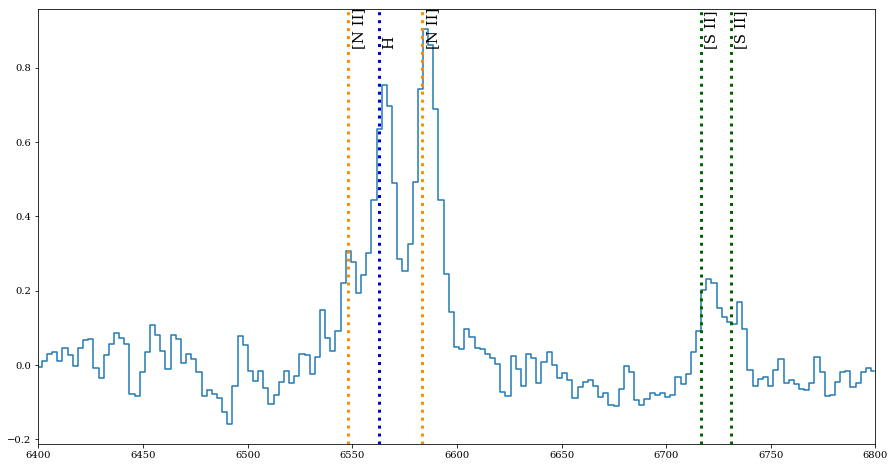

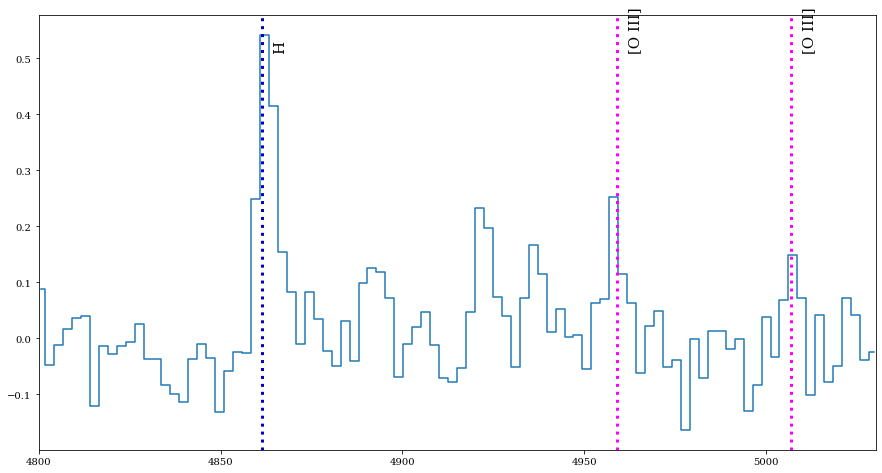

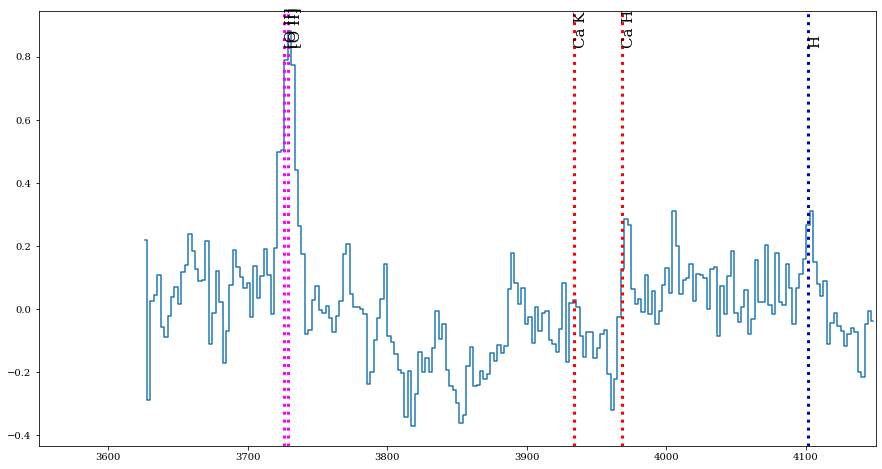

Median continuum:  2.4279882671965396
Median residual:  0.008308681197230161
Residual fraction:  0.3422043388547229 %


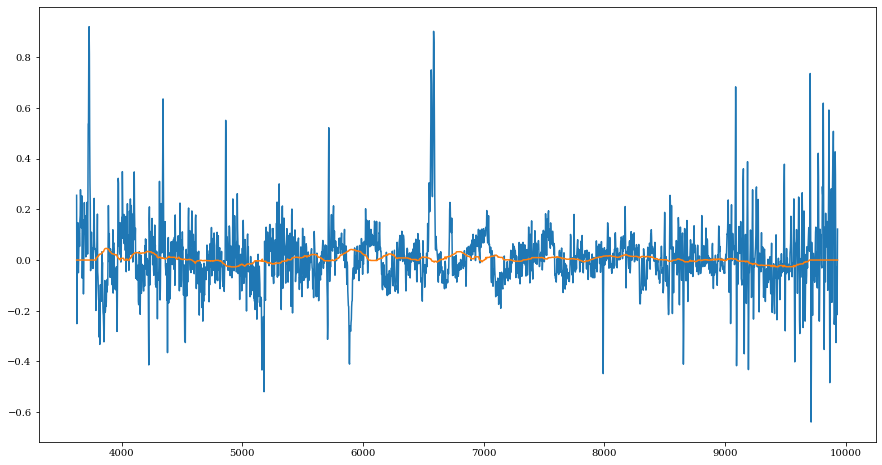

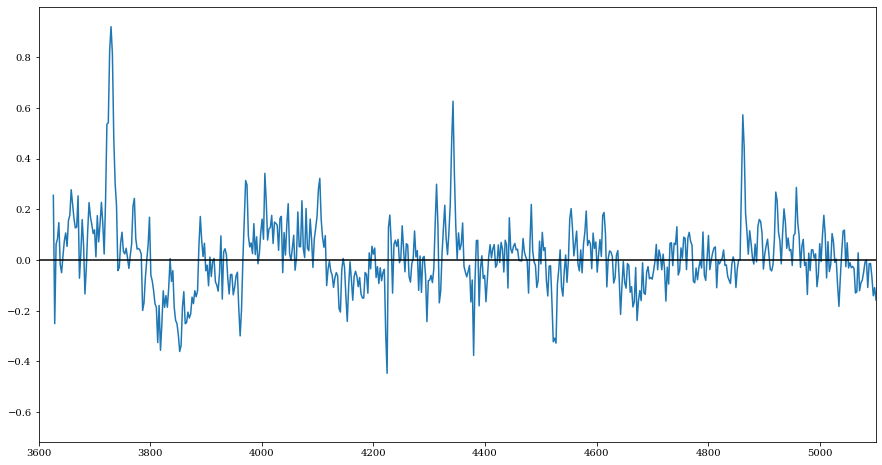

PSNJ1628383-combined-20170403_ap2_1.0_kpc_SN.fits
age: 7.9 Gyr
[Z/H]: -0.39 dex
log M/Msun: 9.88
E(B-V): 0.13 mag


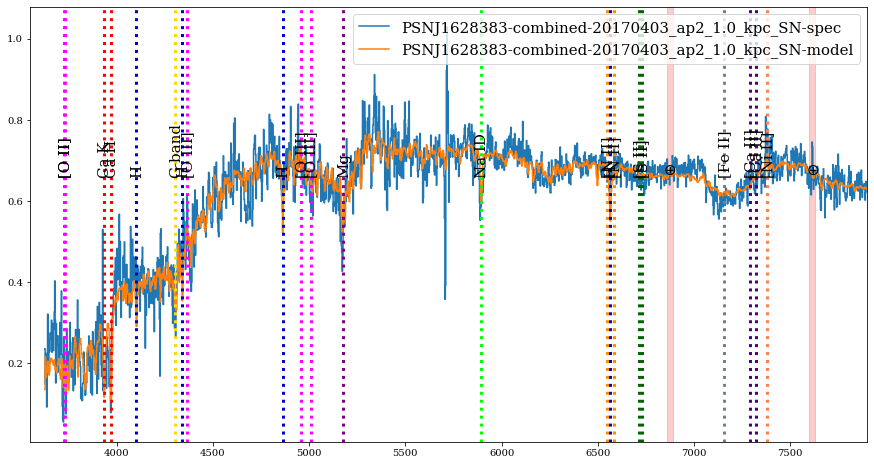

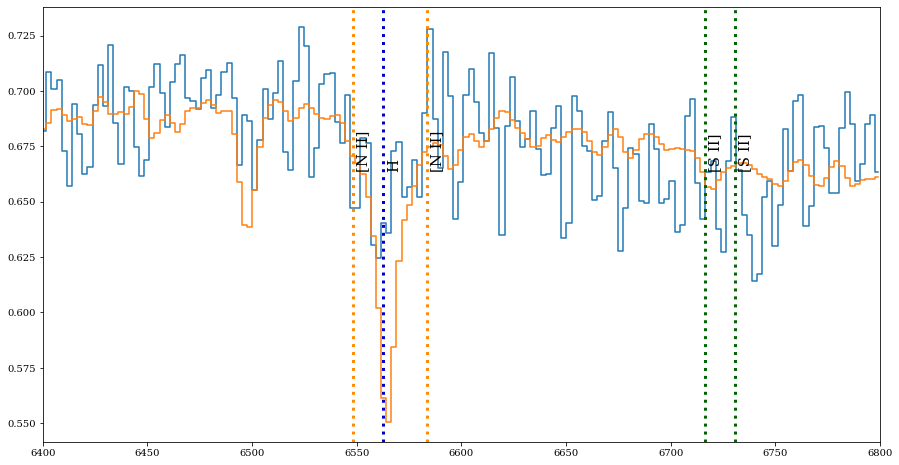

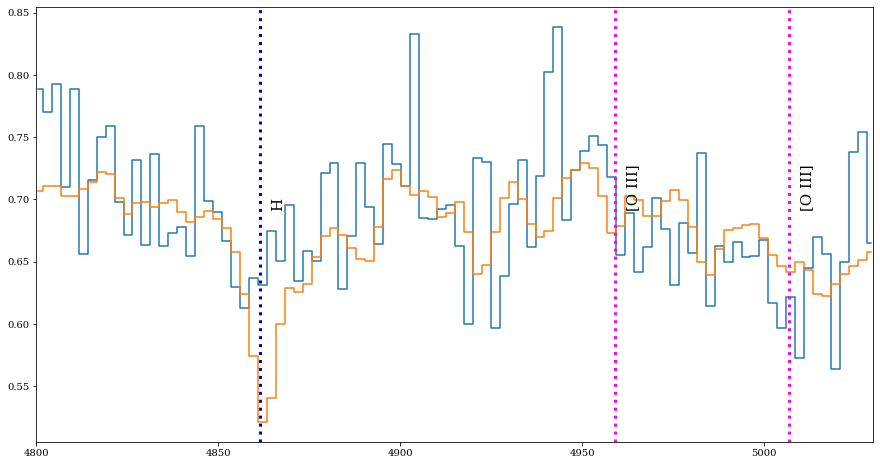

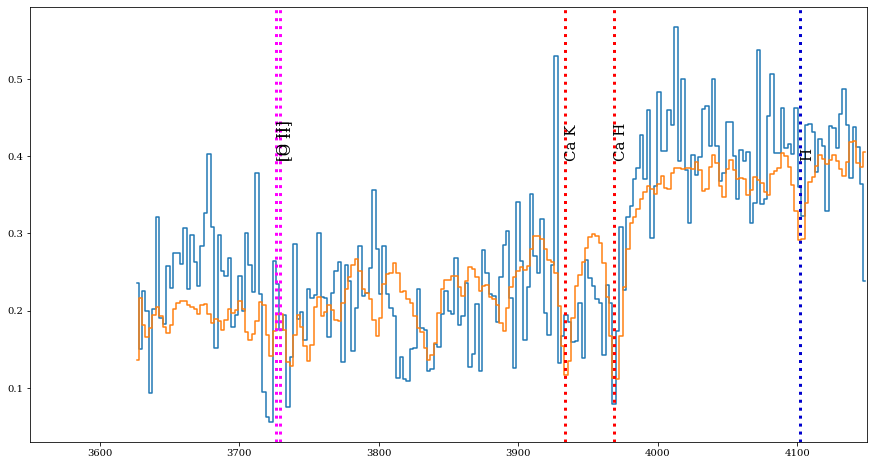

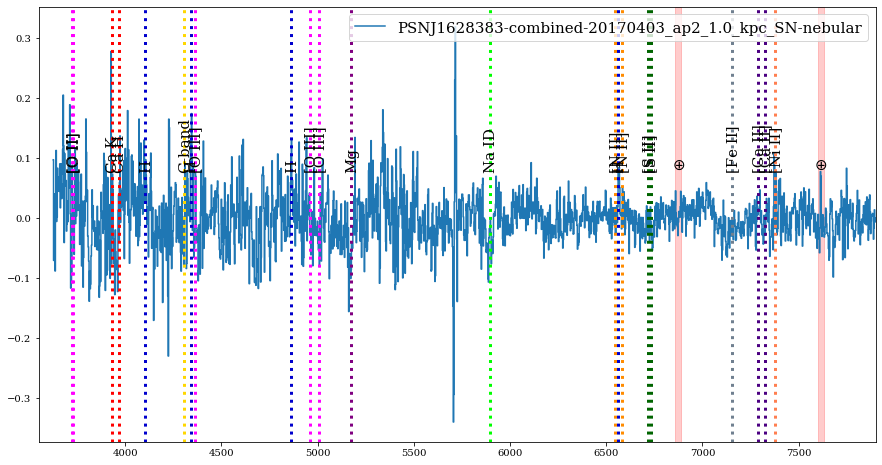

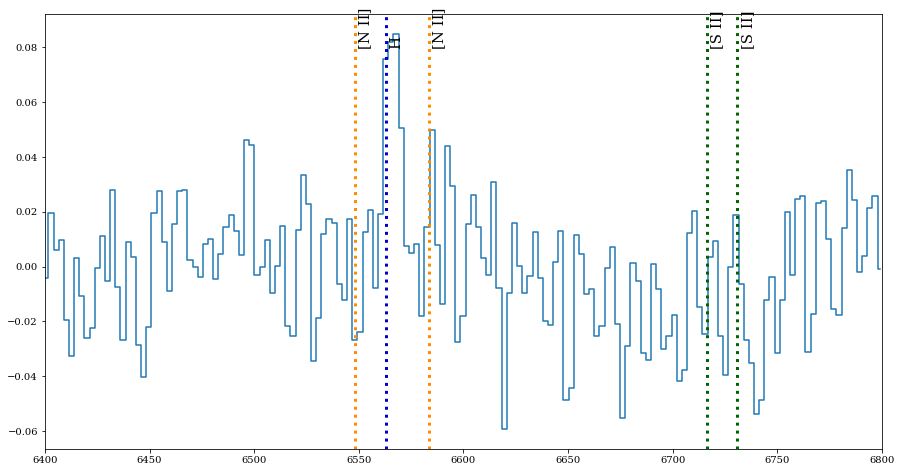

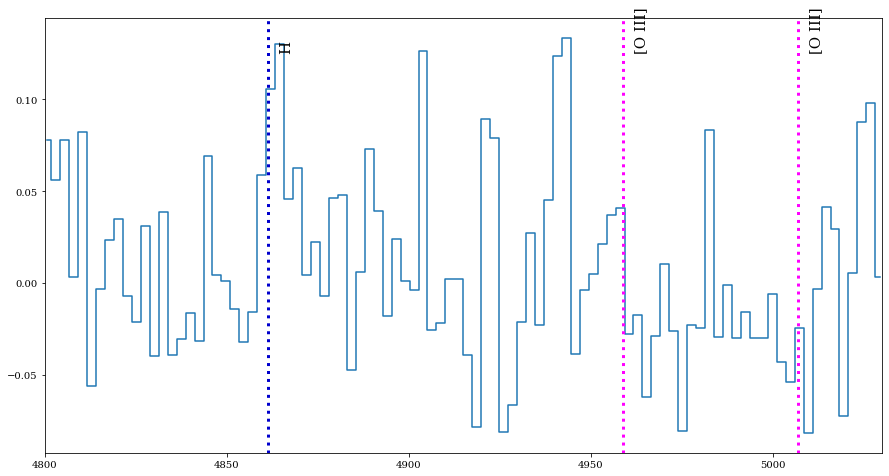

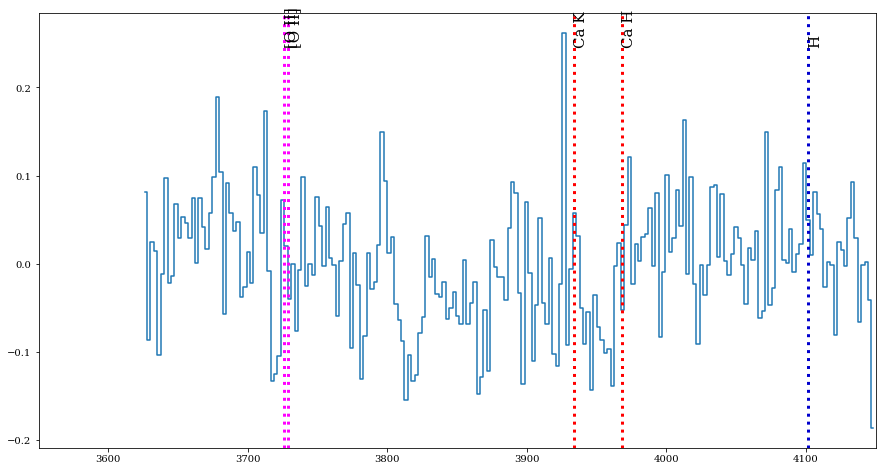

Median continuum:  0.6447462495460508
Median residual:  0.004451283477275747
Residual fraction:  0.6903930779604815 %


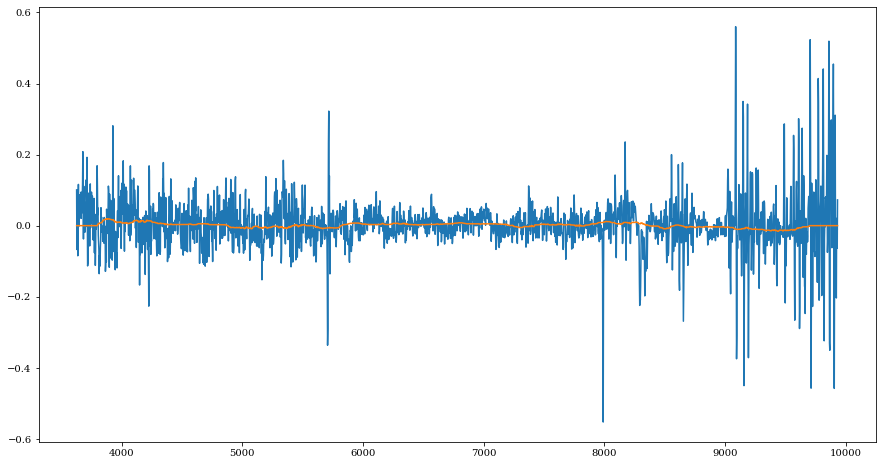

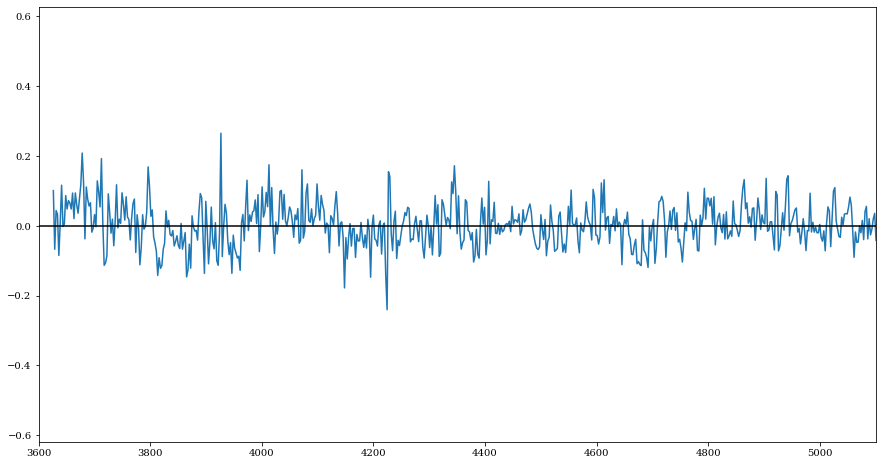

PSNJ1628383-combined-20170403_ap3_1.5_kpc.fits
age: 5.28 Gyr
[Z/H]: -0.12 dex
log M/Msun: 10.5
E(B-V): 0.25 mag


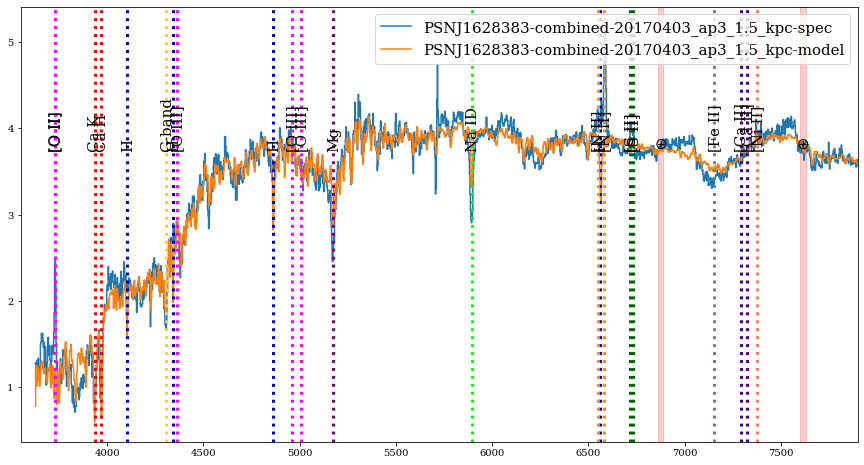

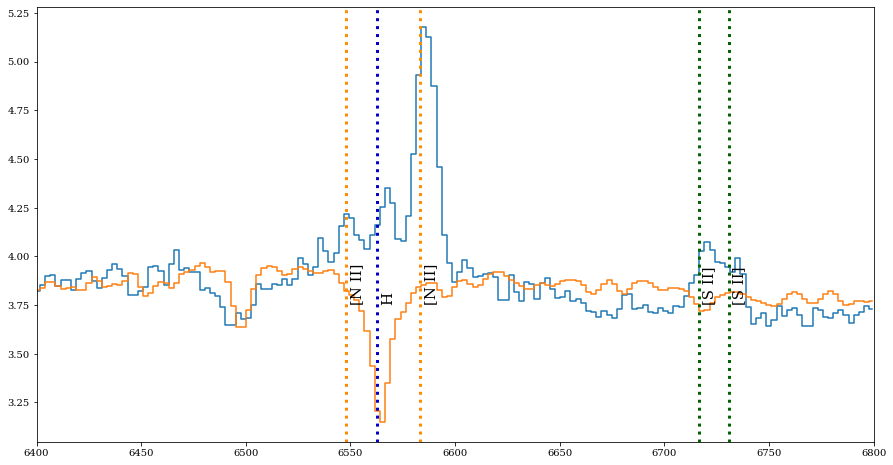

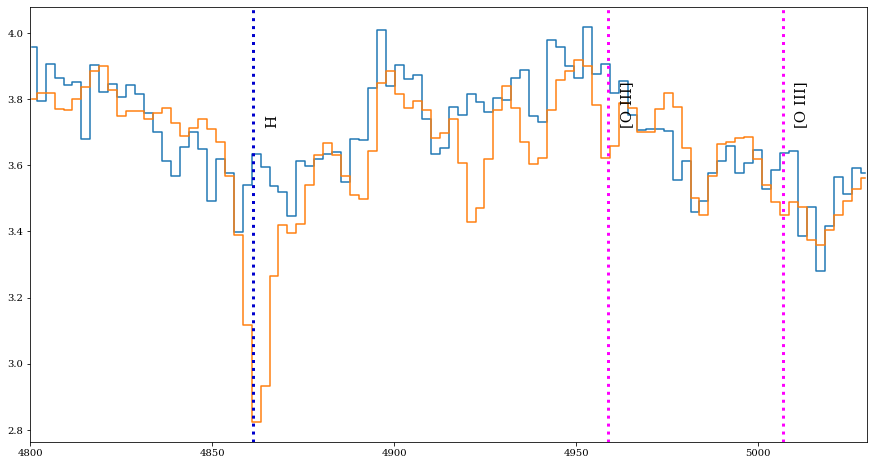

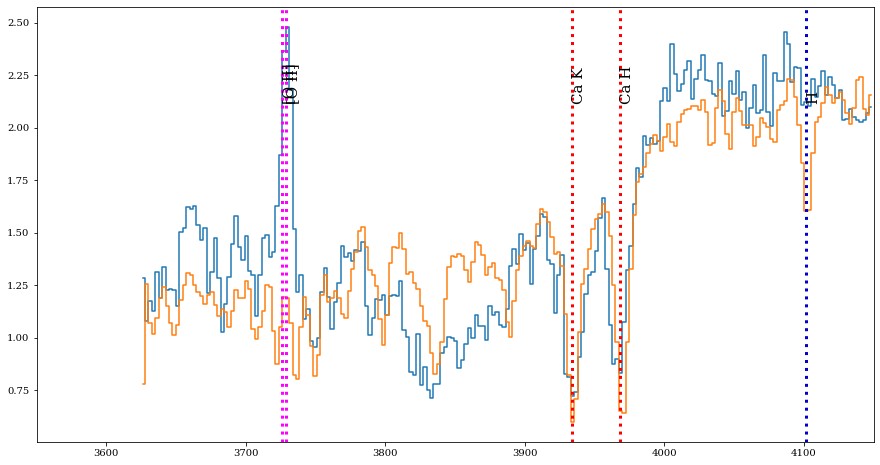

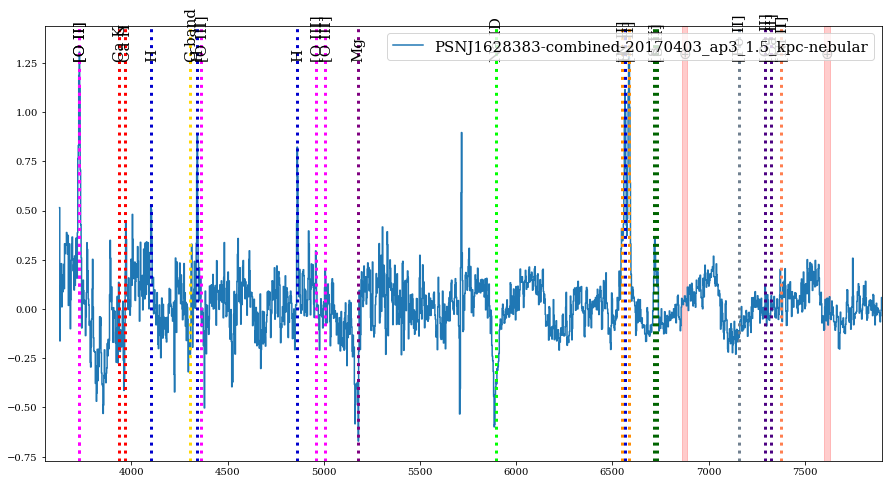

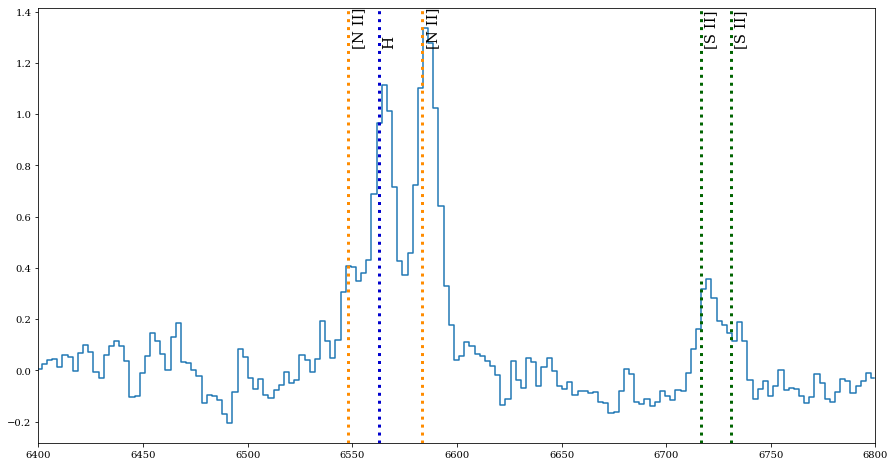

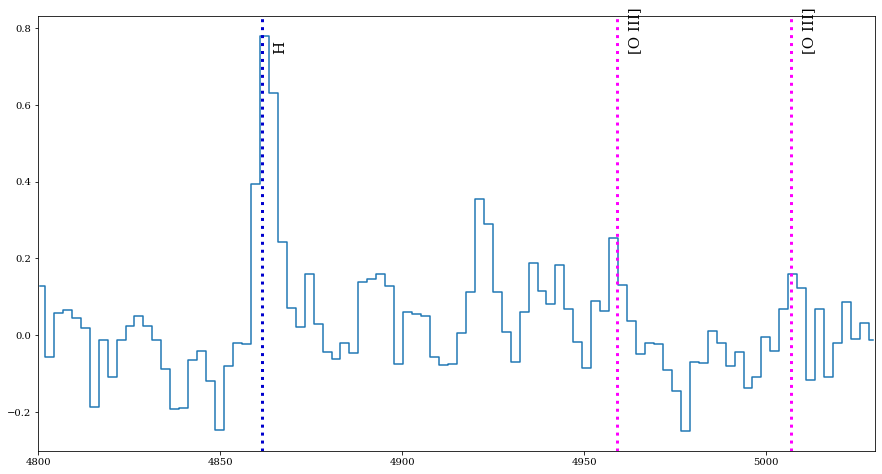

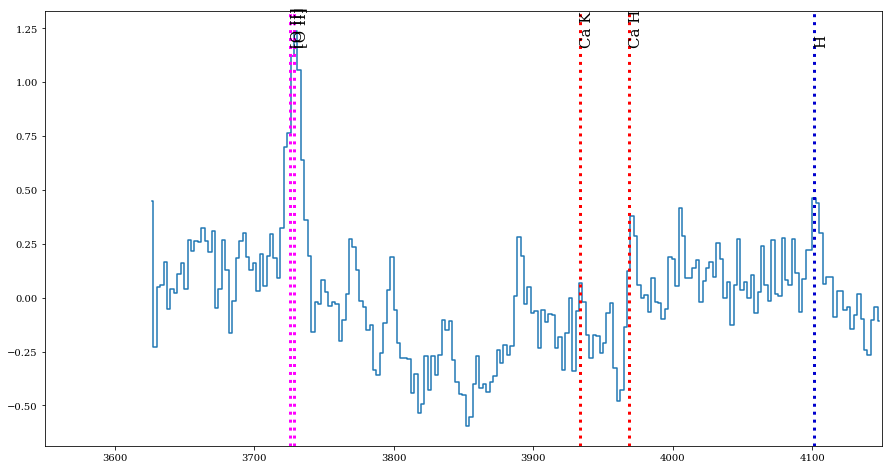

Median continuum:  3.6137542761729367
Median residual:  0.01021773737405951
Residual fraction:  0.2827457705530651 %


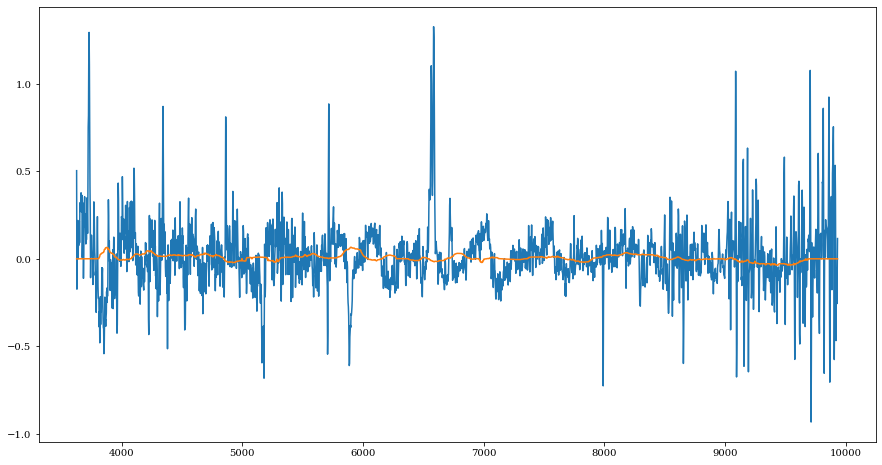

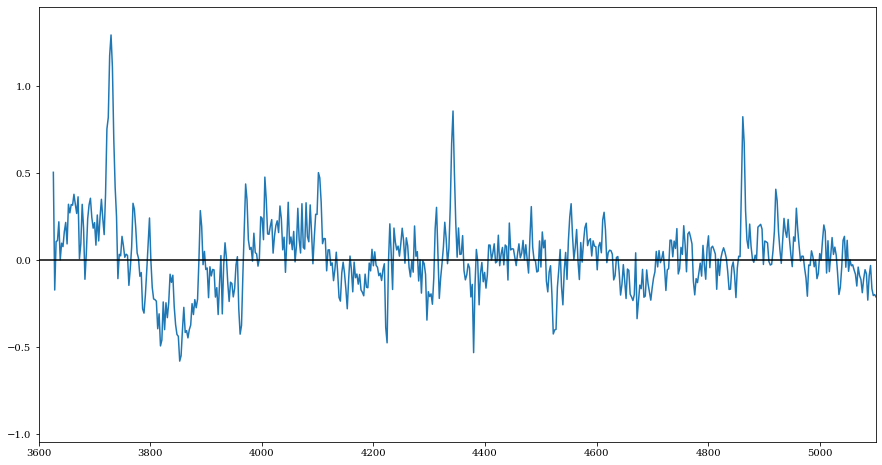

PSNJ1628383-combined-20170403_ap4_1.5_kpc_SN.fits
age: 8.81 Gyr
[Z/H]: -0.41 dex
log M/Msun: 10.11
E(B-V): 0.16 mag


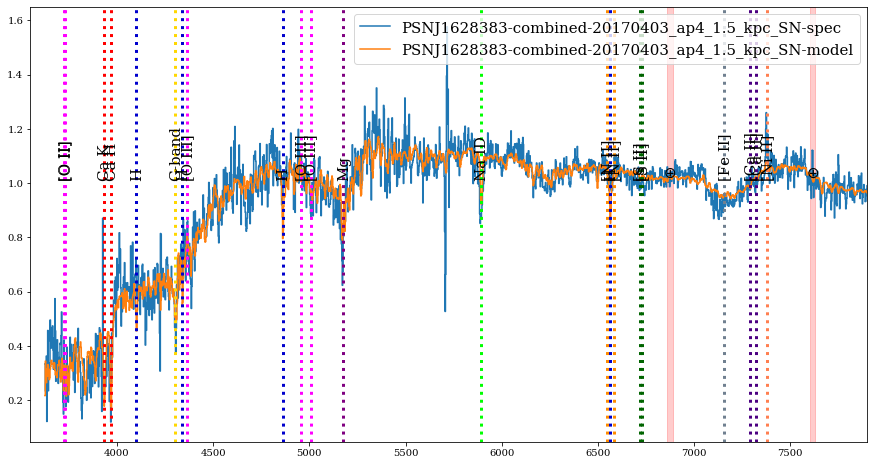

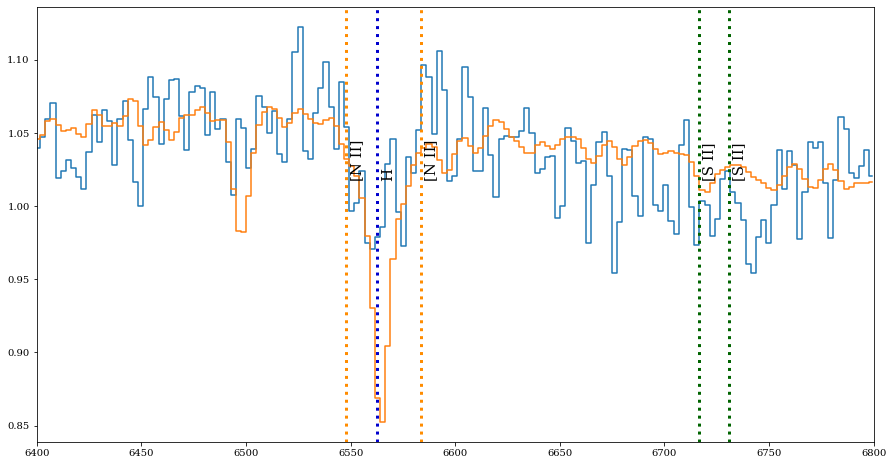

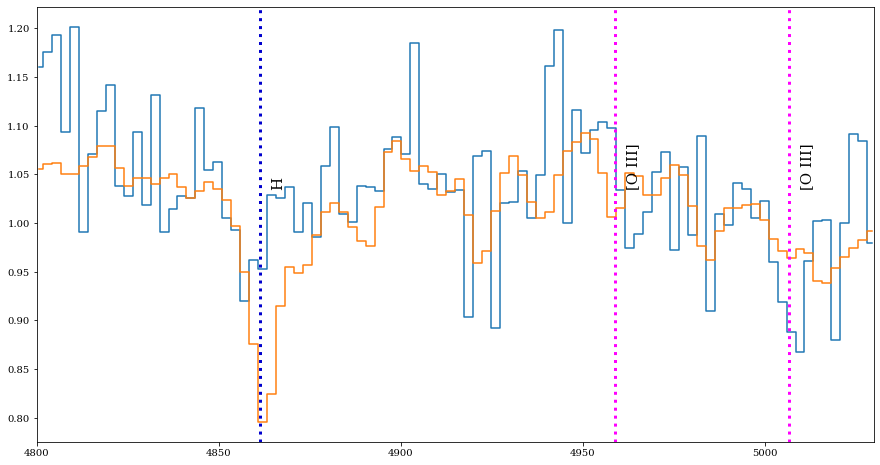

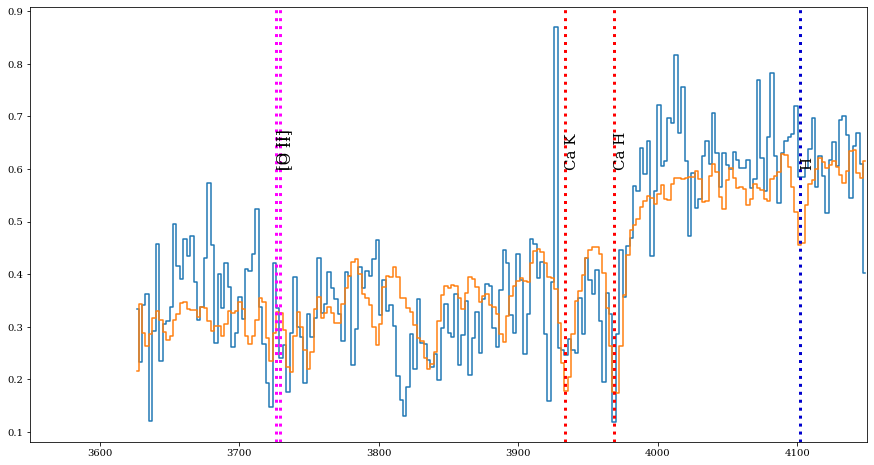

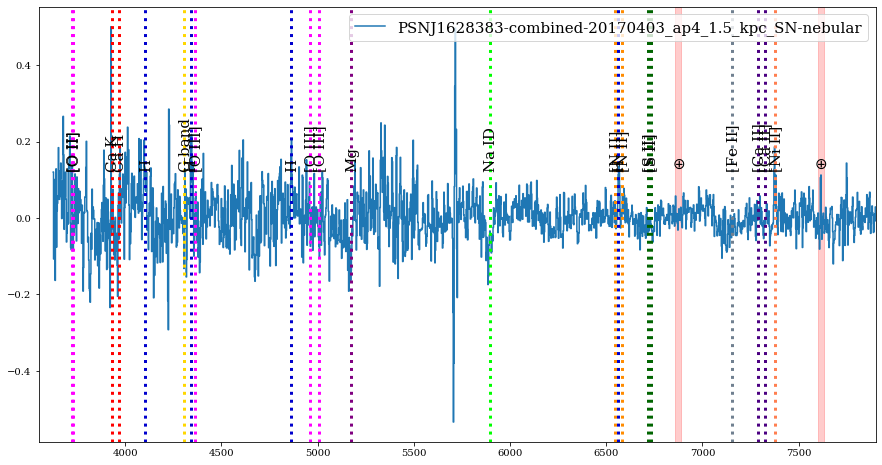

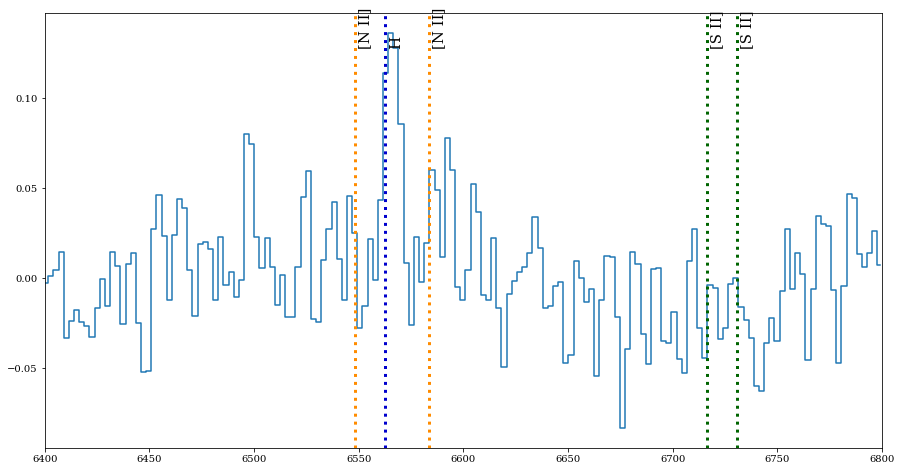

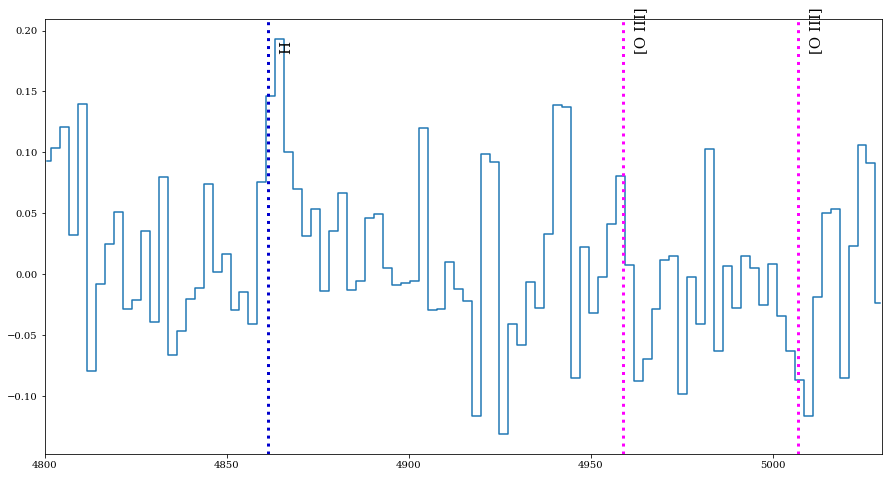

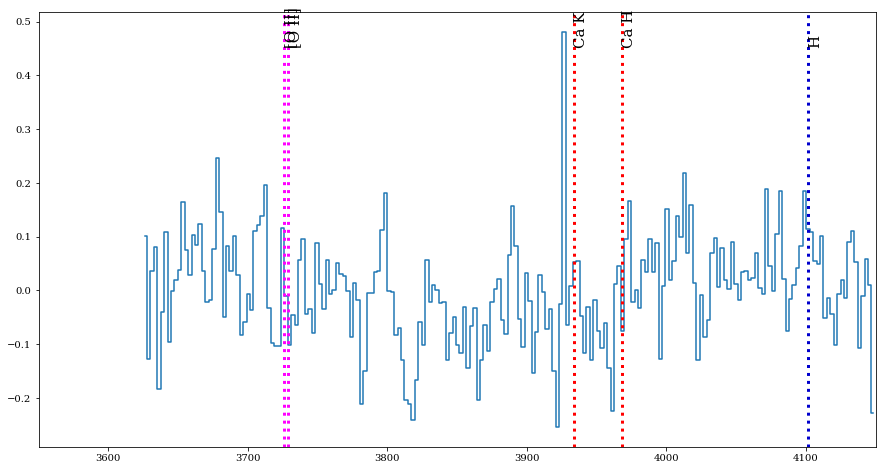

Median continuum:  0.9853491487897735
Median residual:  0.0040086014731017805
Residual fraction:  0.4068204126451247 %


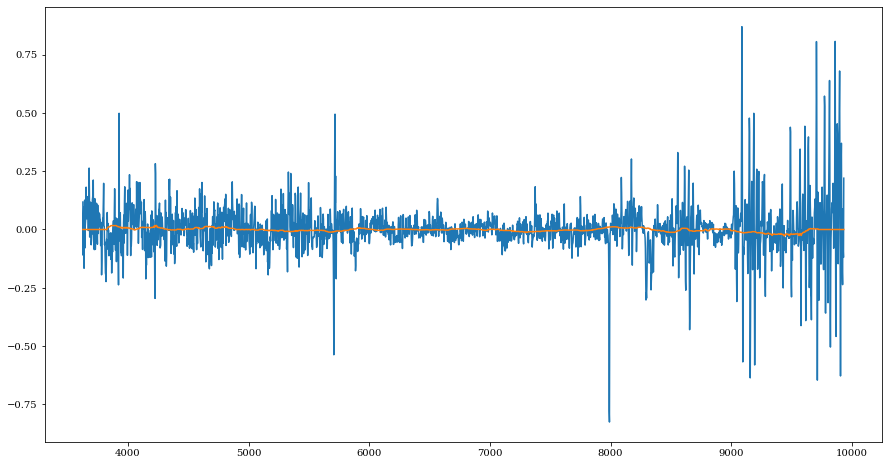

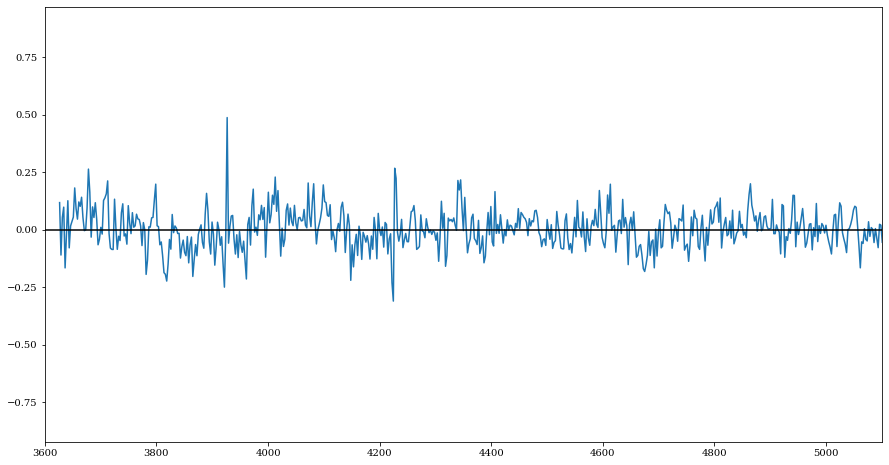

PSNJ1628383-combined-20170403_ap5_2.0_kpc.fits
age: 7.99 Gyr
[Z/H]: -0.12 dex
log M/Msun: 10.81
E(B-V): 0.09 mag


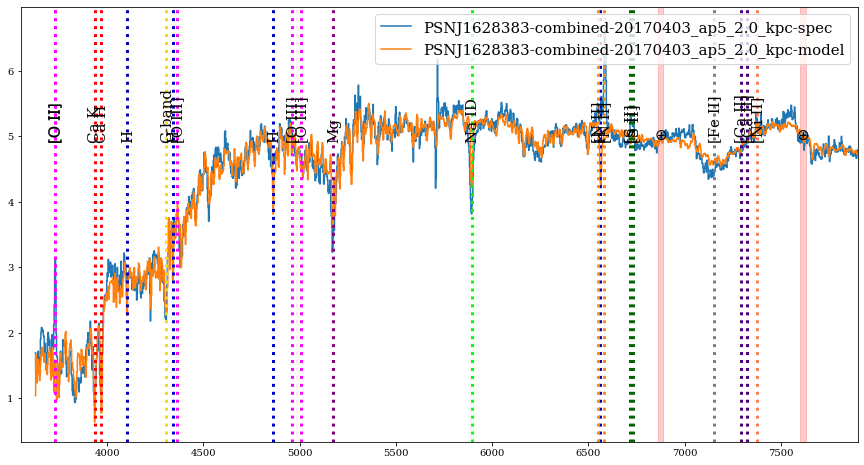

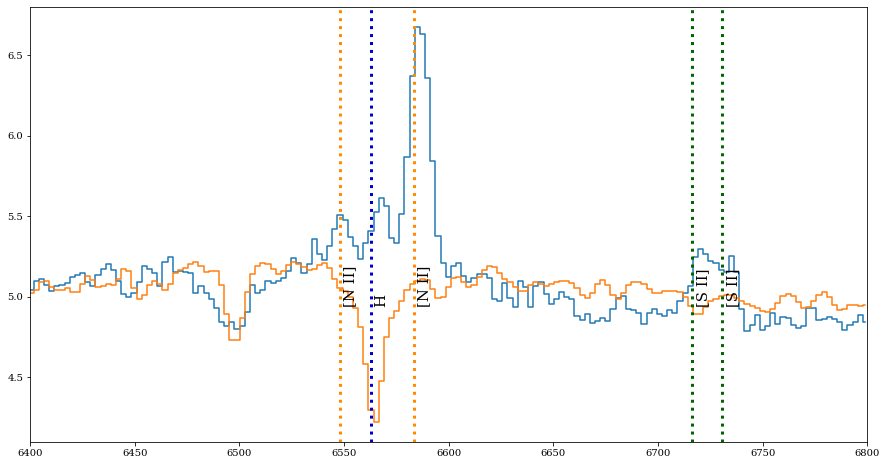

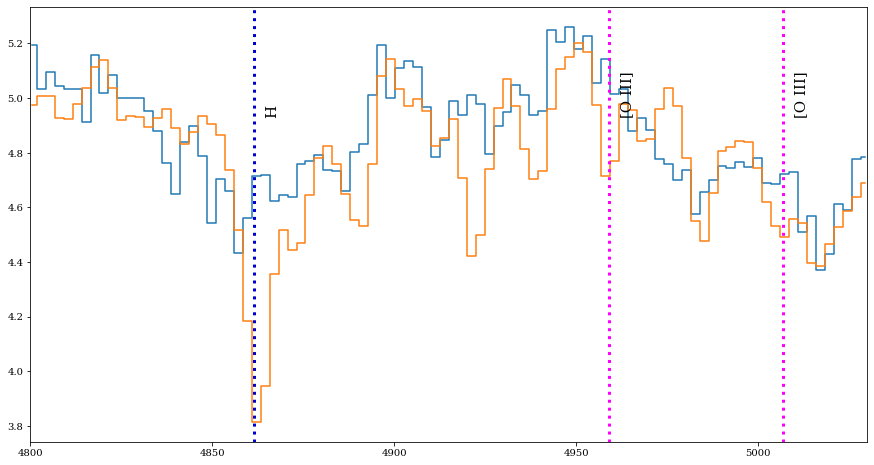

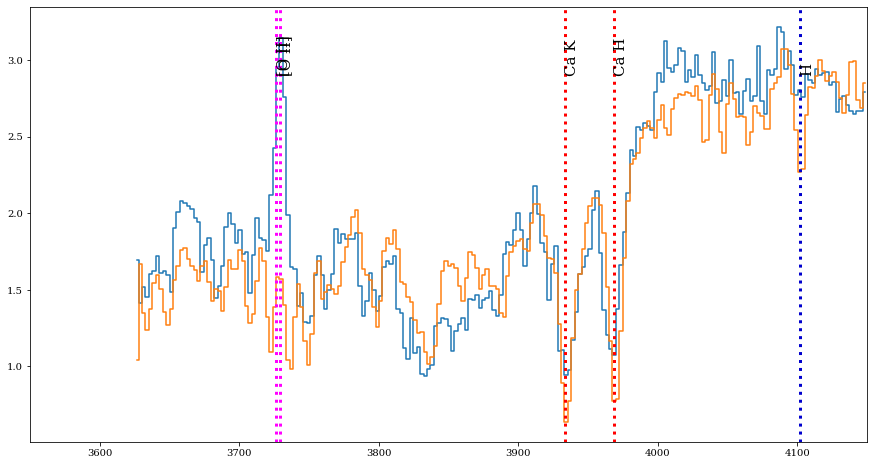

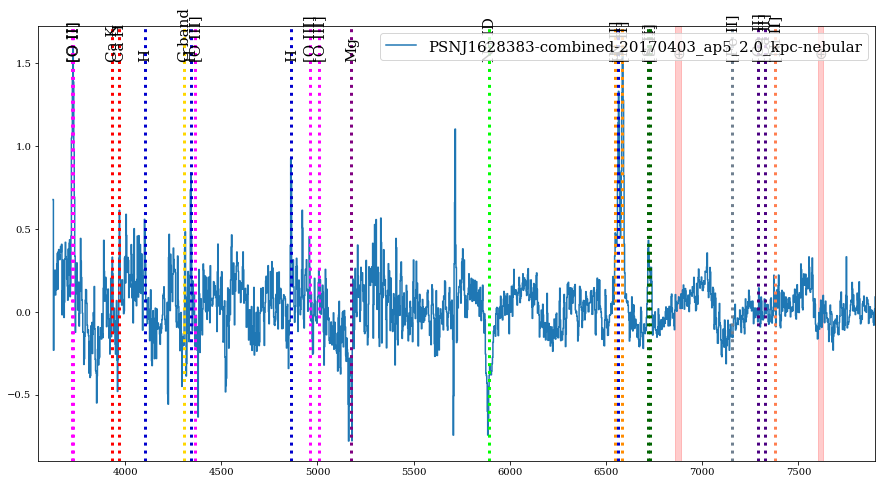

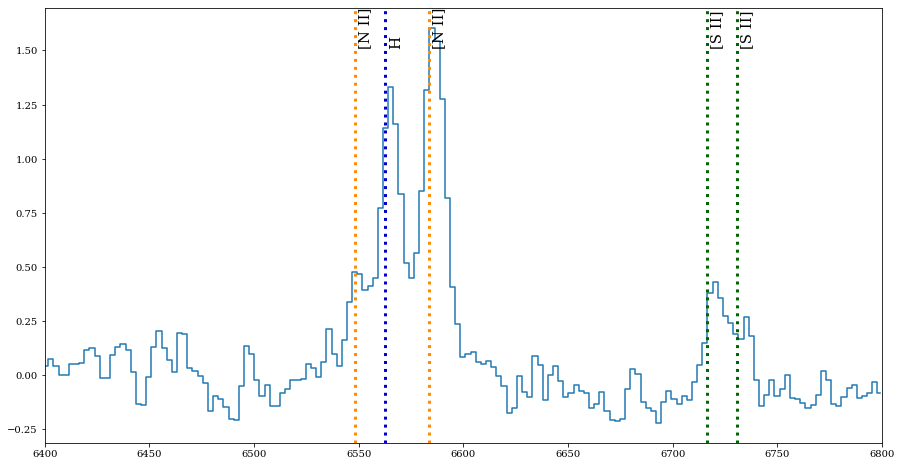

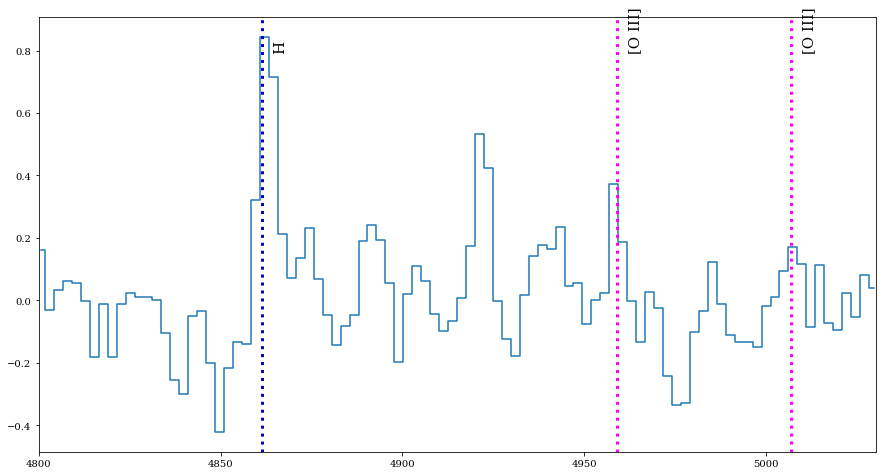

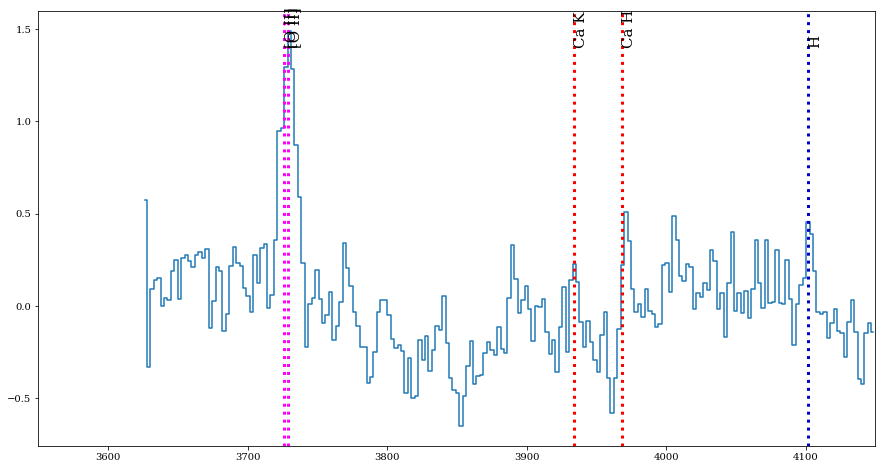

Median continuum:  4.74608565307259
Median residual:  0.016994298301854727
Residual fraction:  0.3580697767401798 %


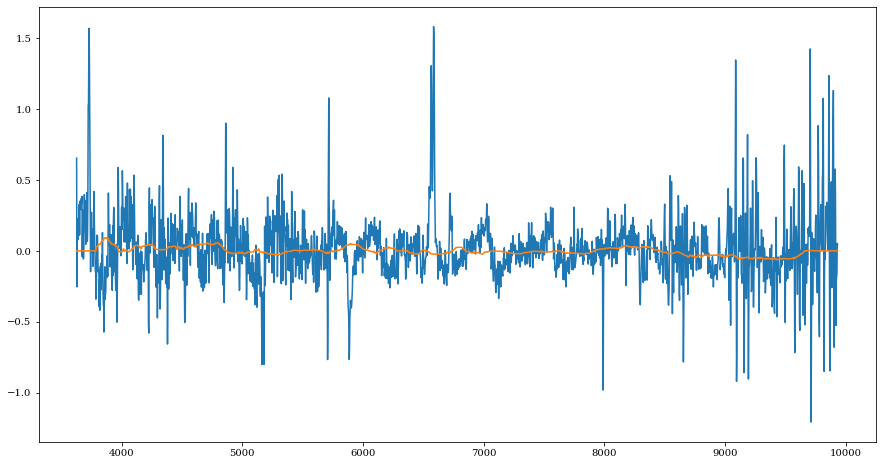

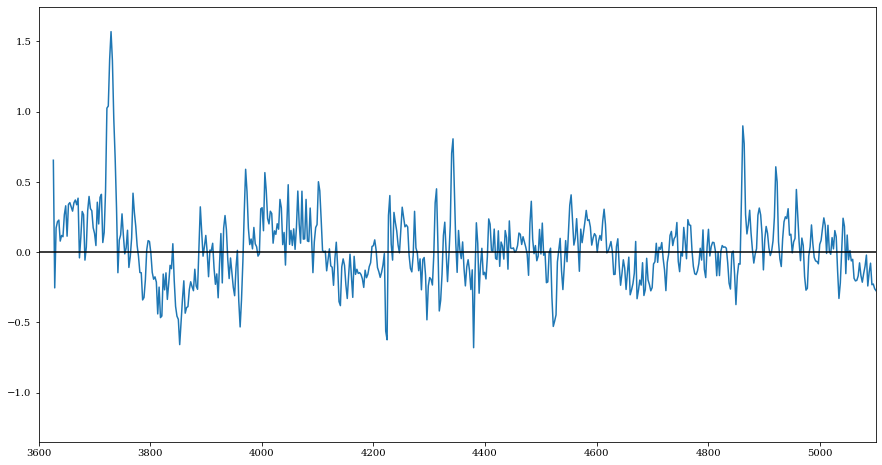

PSNJ1628383-combined-20170403_ap6_2.0_kpc_SN.fits
age: 4.51 Gyr
[Z/H]: -0.36 dex
log M/Msun: 10.02
E(B-V): 0.15 mag


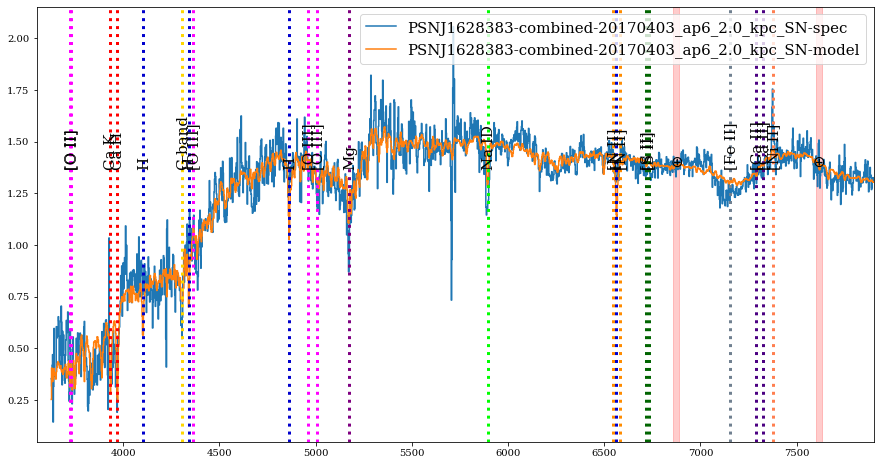

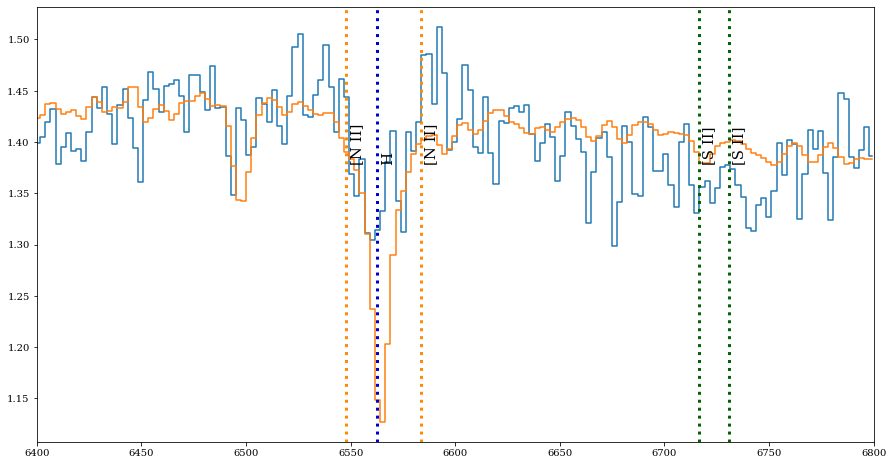

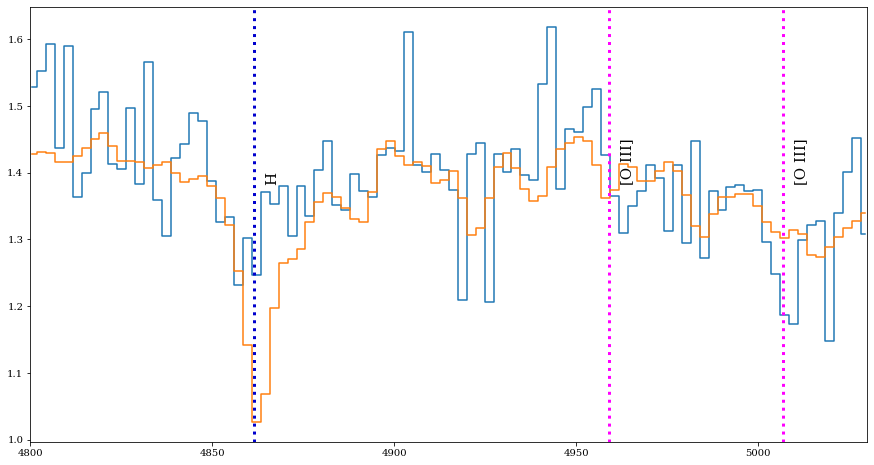

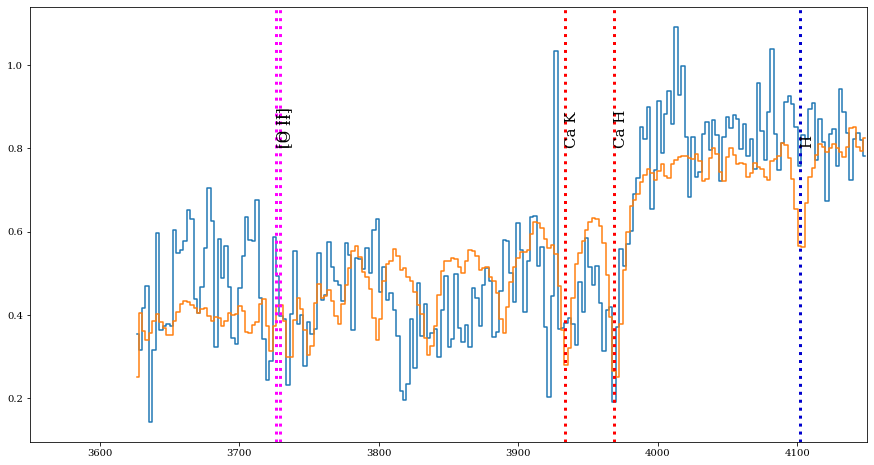

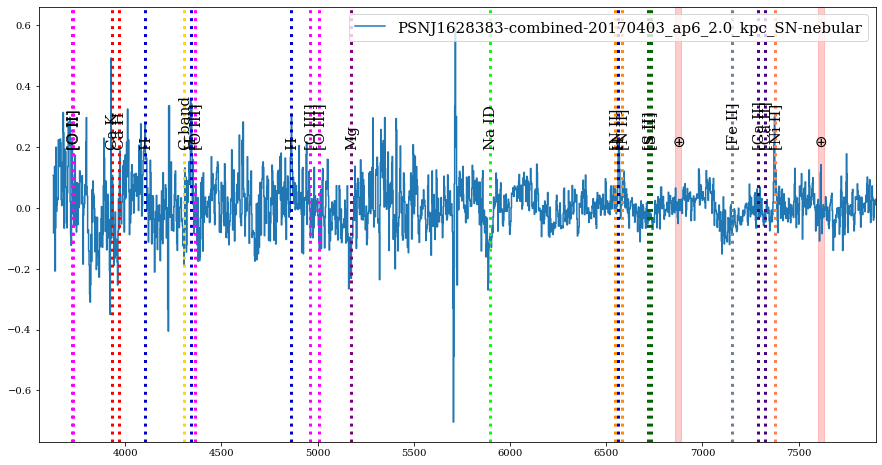

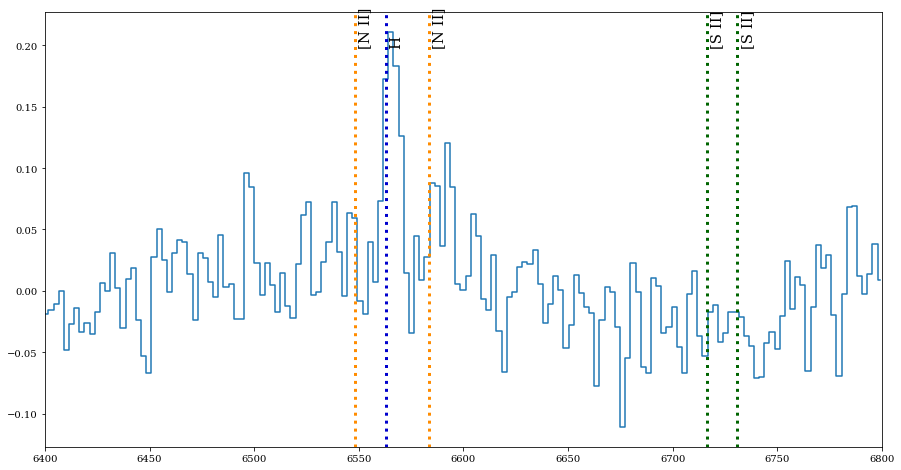

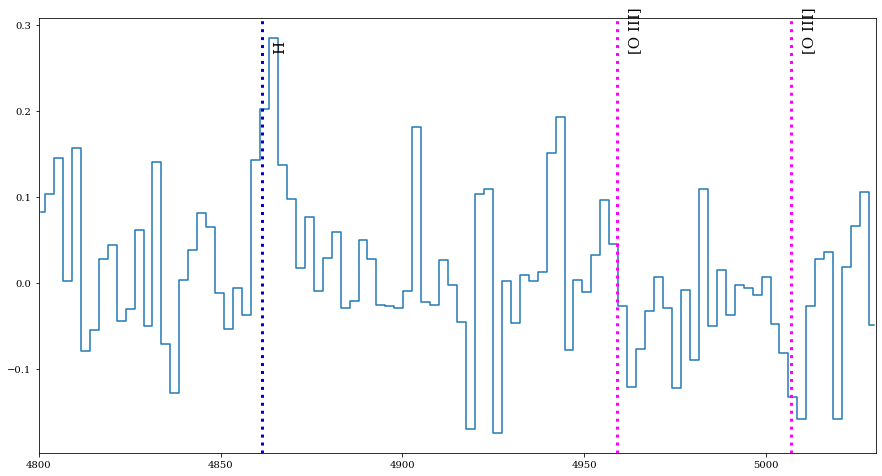

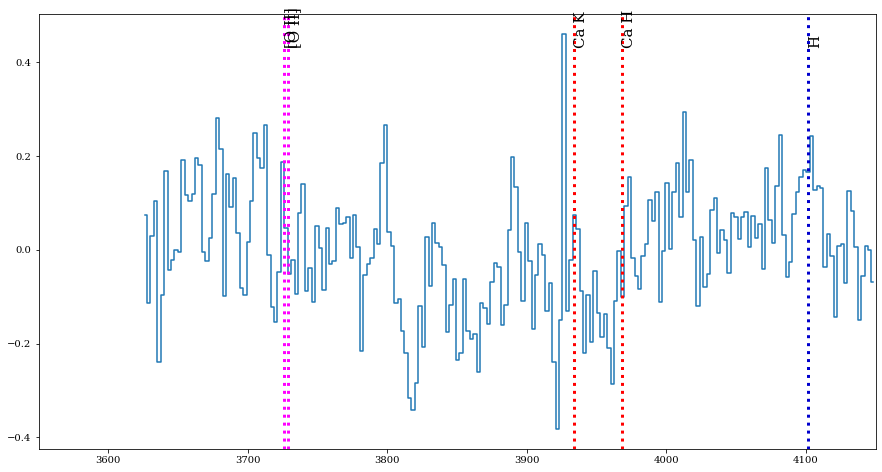

Median continuum:  1.3314530066206802
Median residual:  0.005786740776853927
Residual fraction:  0.4346184768128674 %


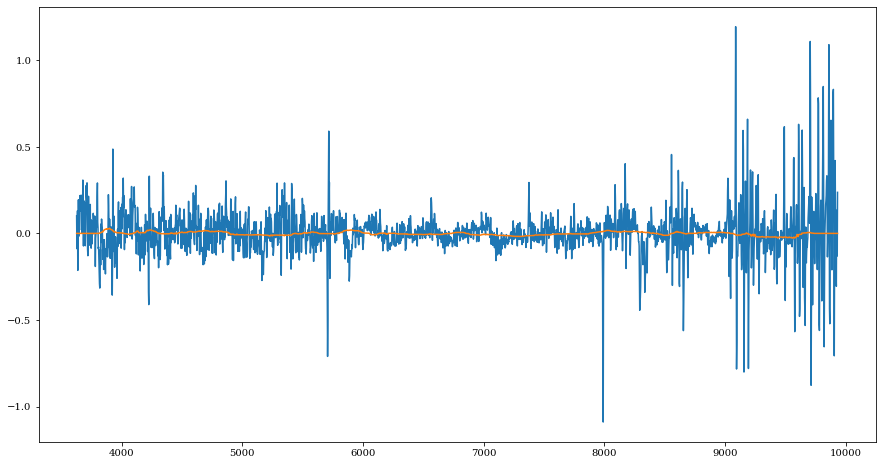

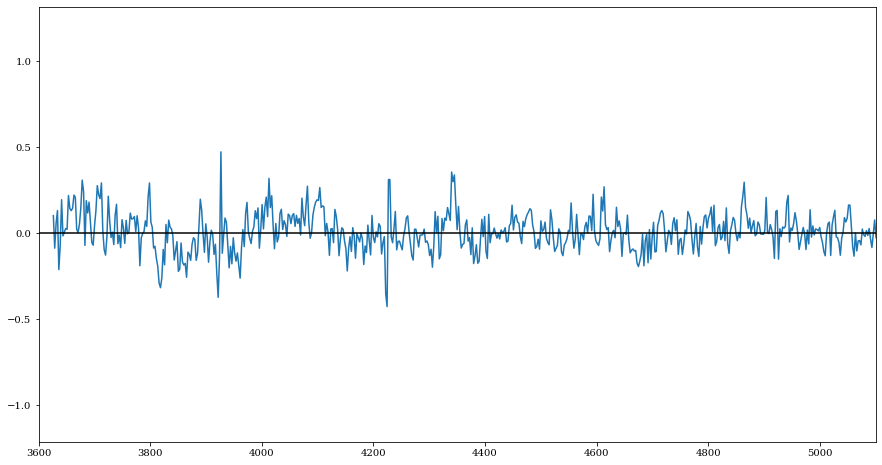

PSNJ1628383-combined-20170403_ap7_3.0_kpc.fits
age: 7.69 Gyr
[Z/H]: -0.37 dex
log M/Msun: 10.9
E(B-V): 0.26 mag


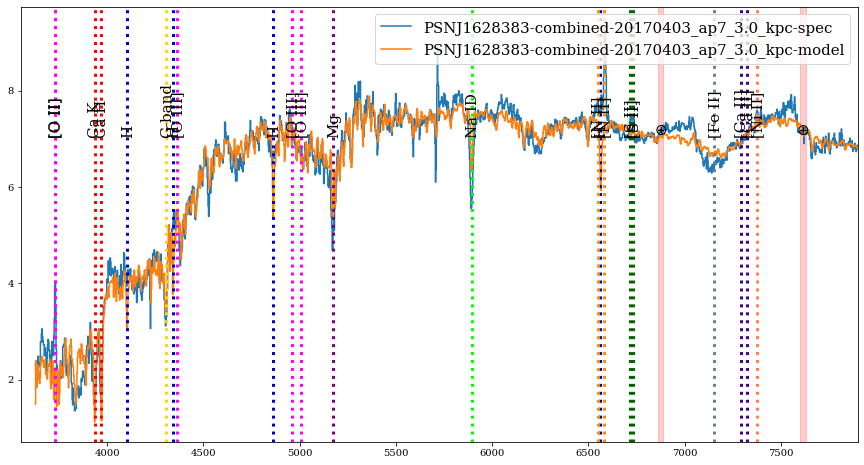

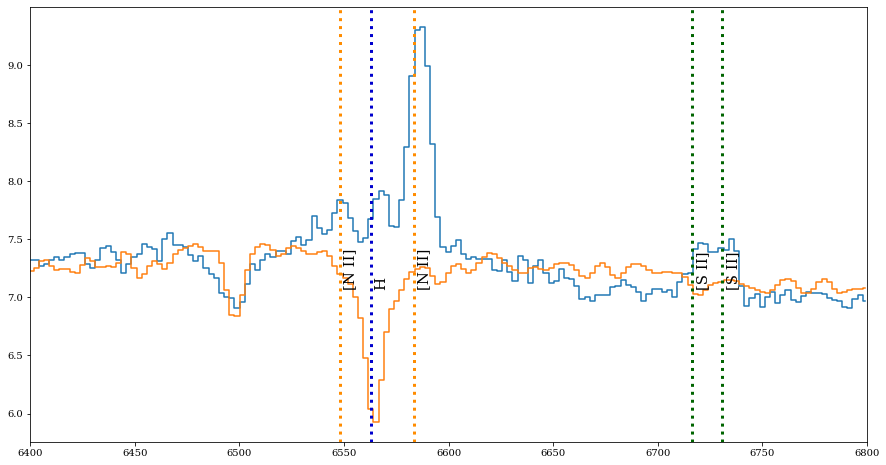

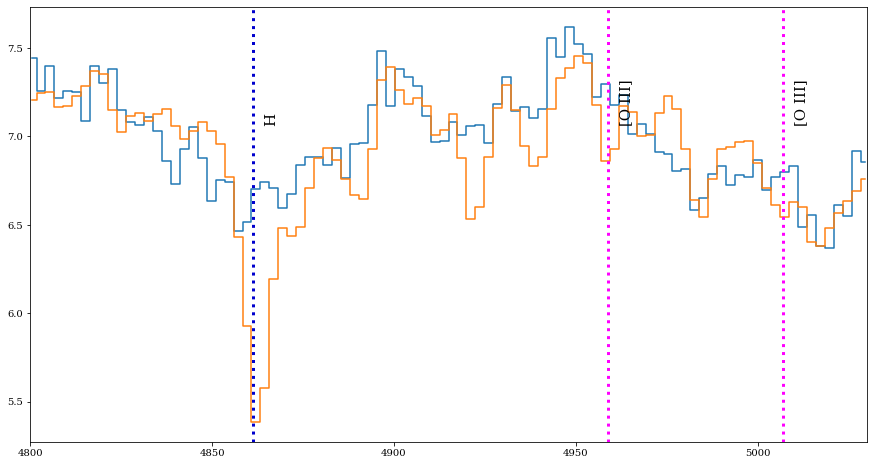

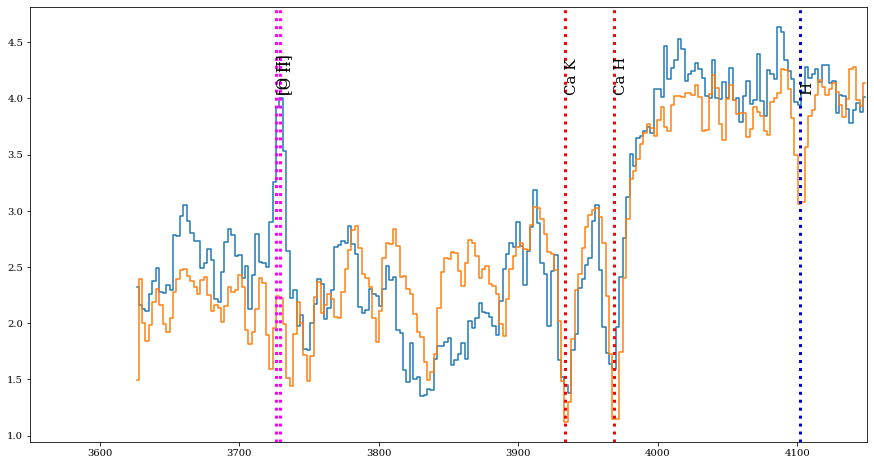

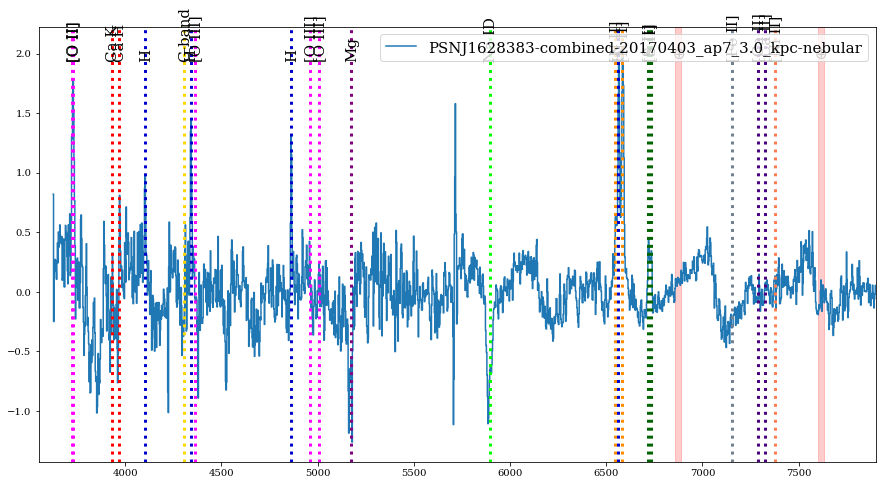

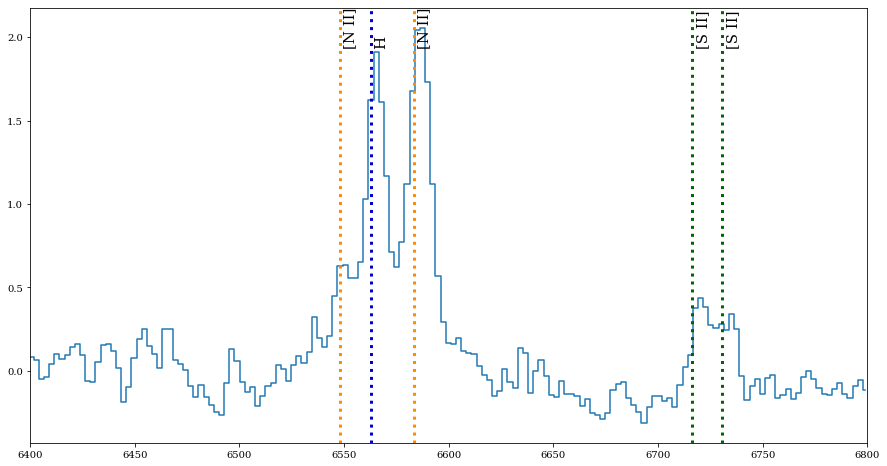

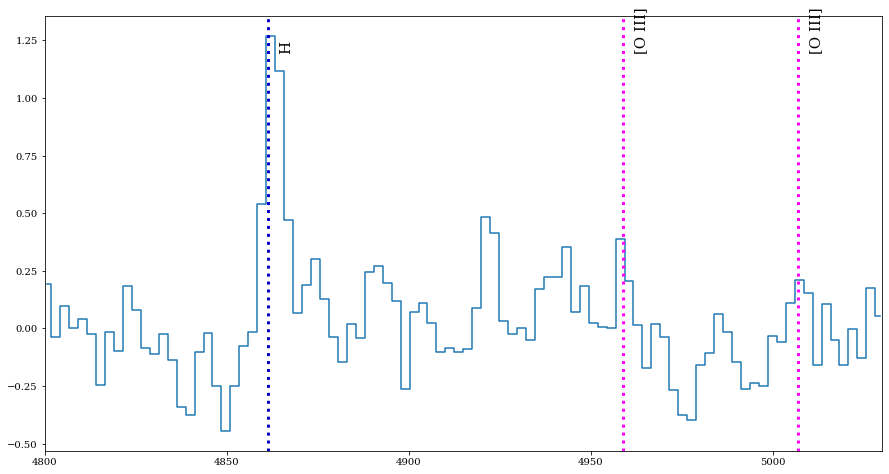

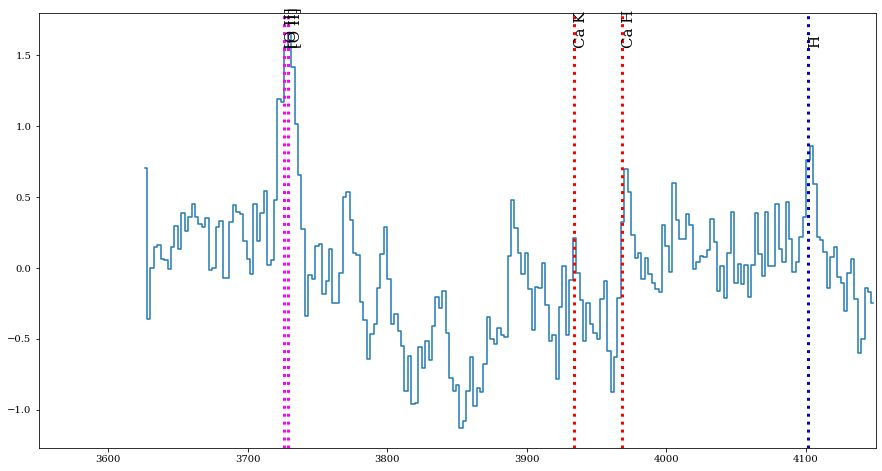

Median continuum:  6.8373871402864275
Median residual:  0.02226605893402578
Residual fraction:  0.3256515753339809 %


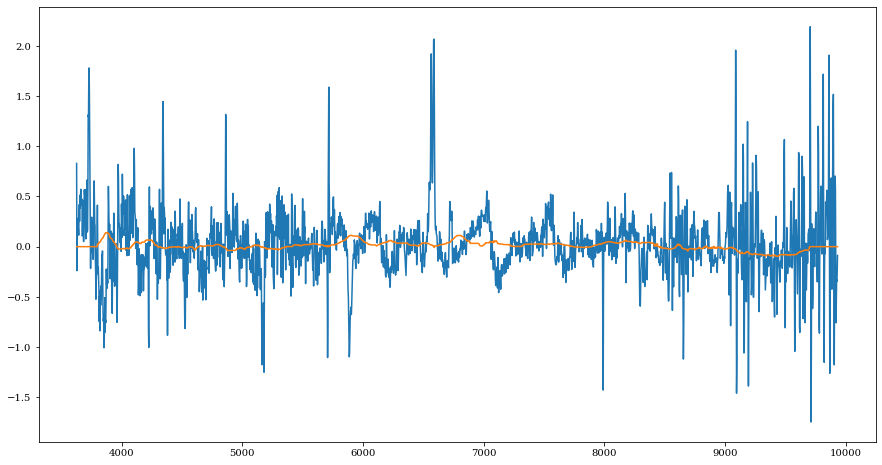

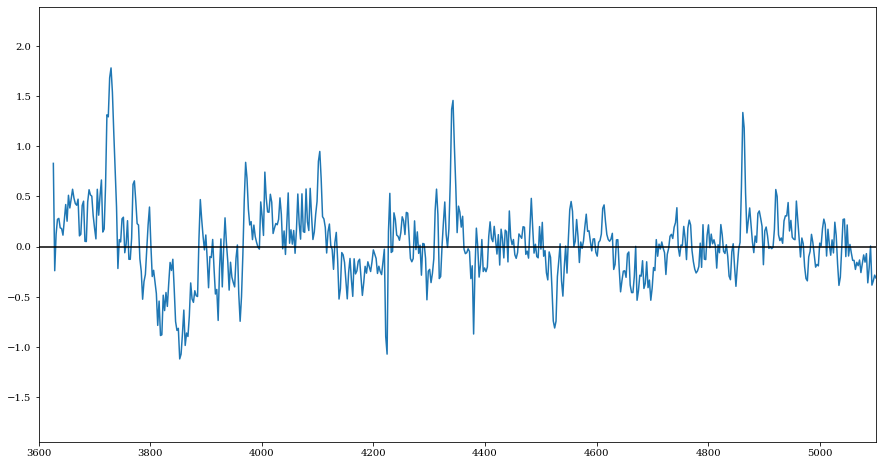

PSNJ1628383-combined-20170403_ap8_3.0_kpc_SN.fits
age: 7.56 Gyr
[Z/H]: -0.21 dex
log M/Msun: 10.41
E(B-V): 0.08 mag


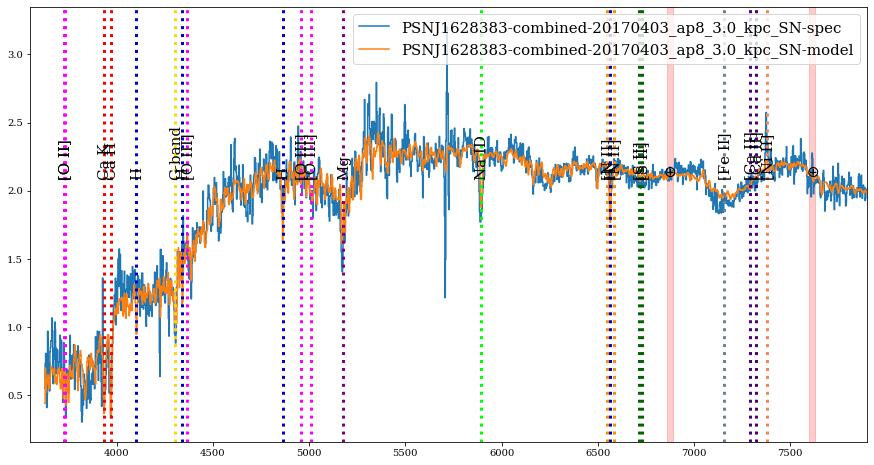

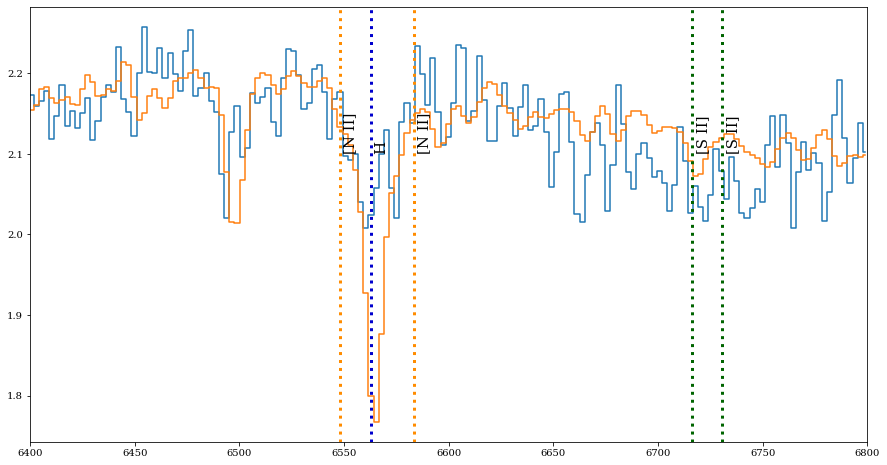

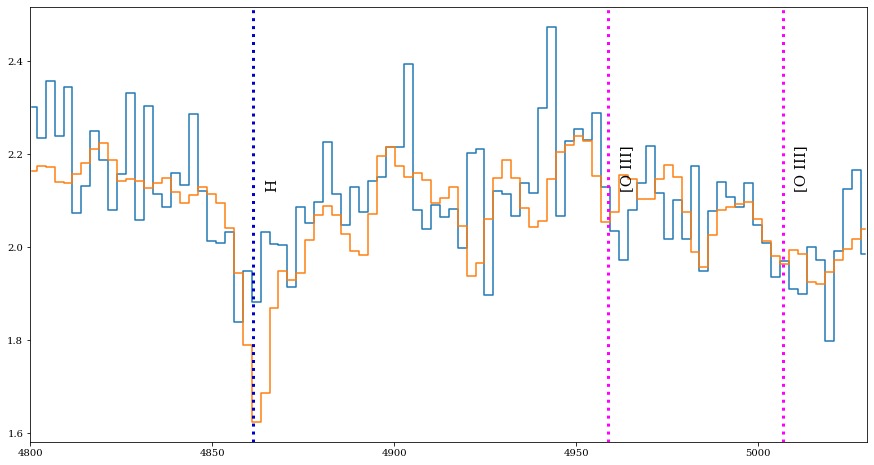

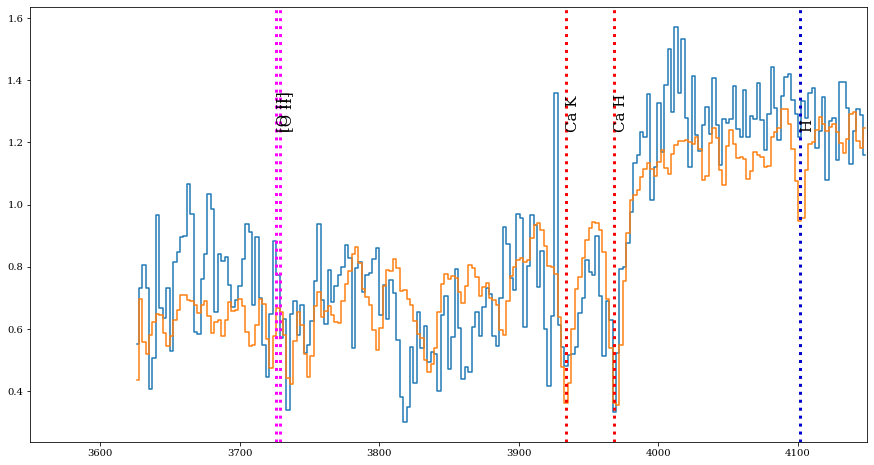

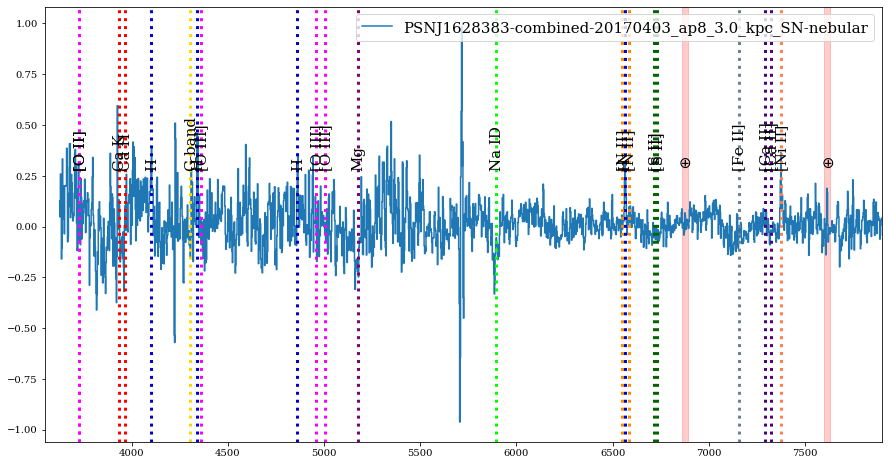

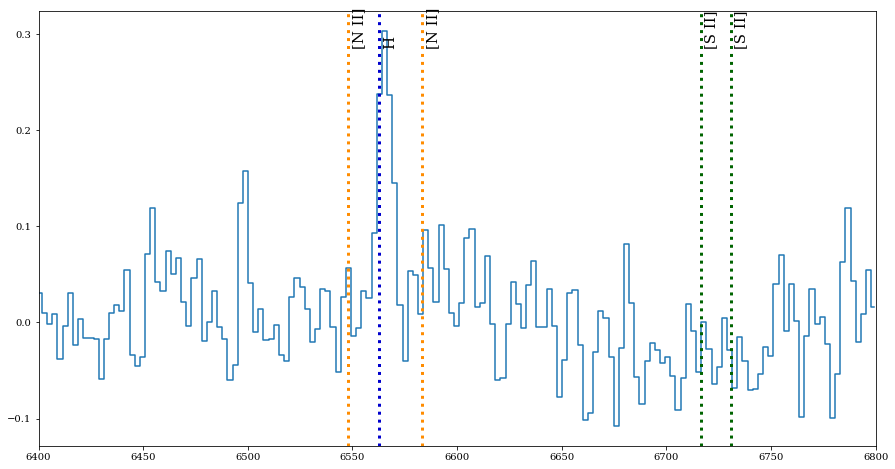

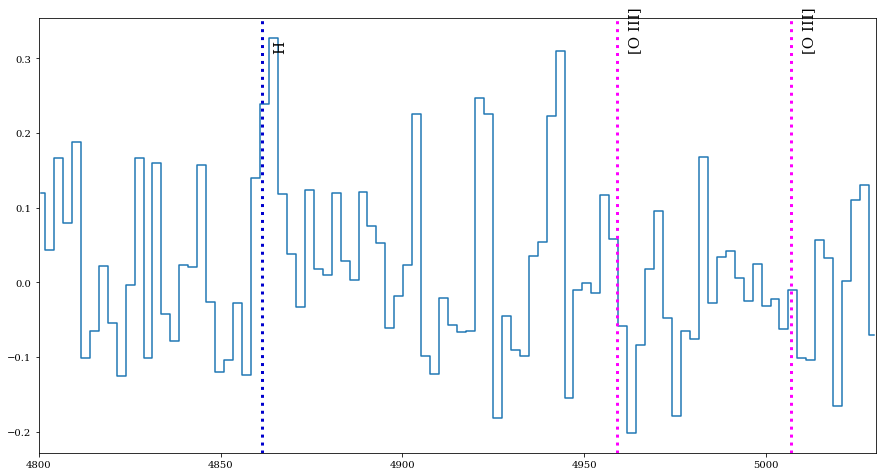

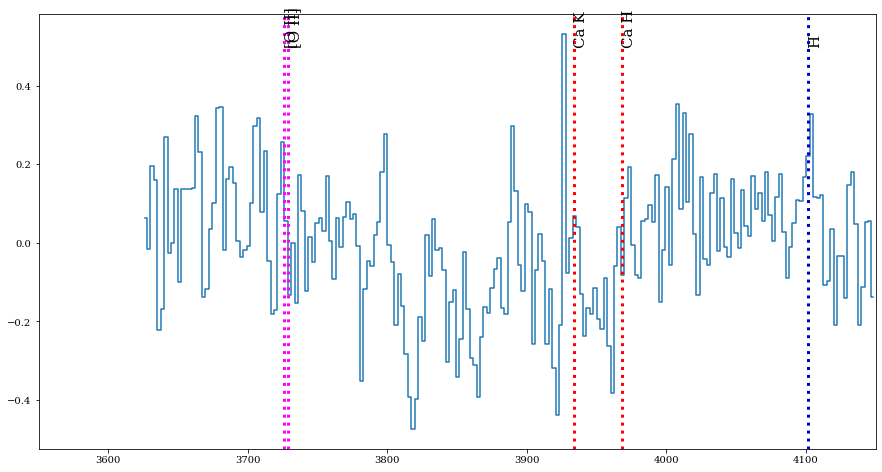

Median continuum:  2.0266433682460336
Median residual:  0.008774591757148231
Residual fraction:  0.43296180742161045 %


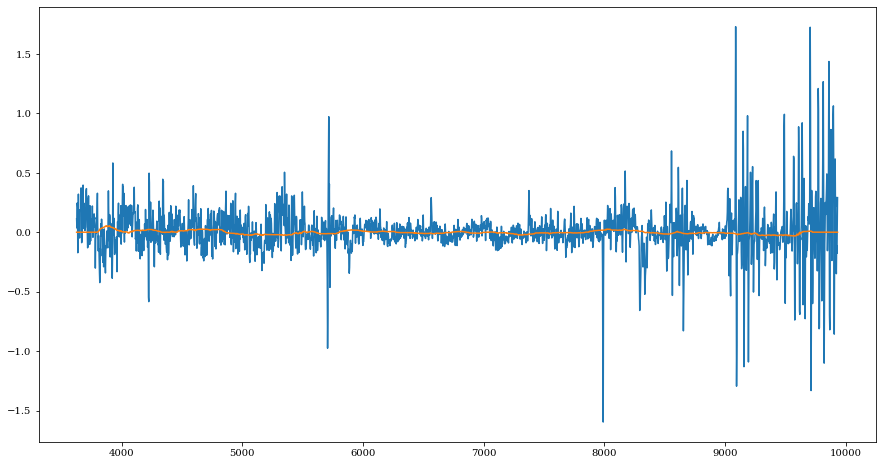

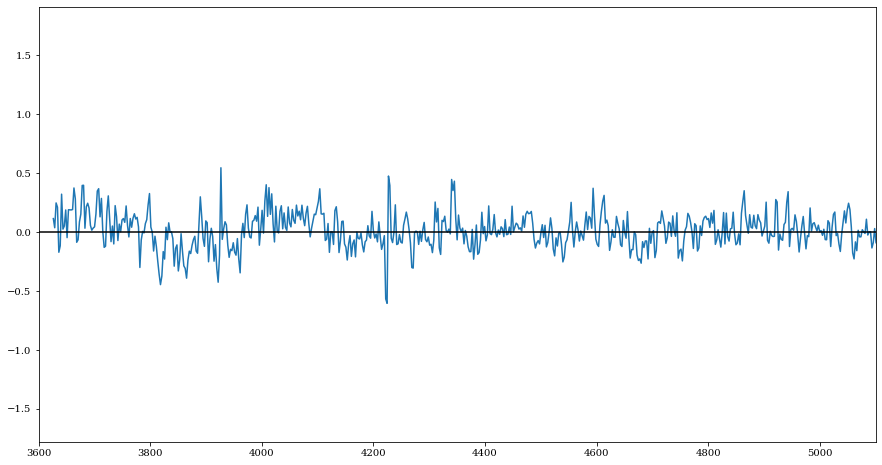

PSNJ1628383-combined-20170403_ap9_34.67_rkron.fits
age: 6.31 Gyr
[Z/H]: -0.06 dex
log M/Msun: 11.34
E(B-V): 0.12 mag


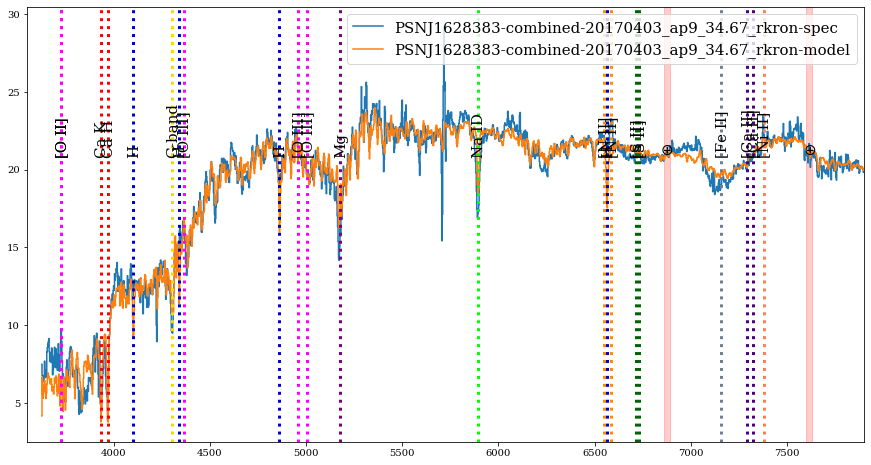

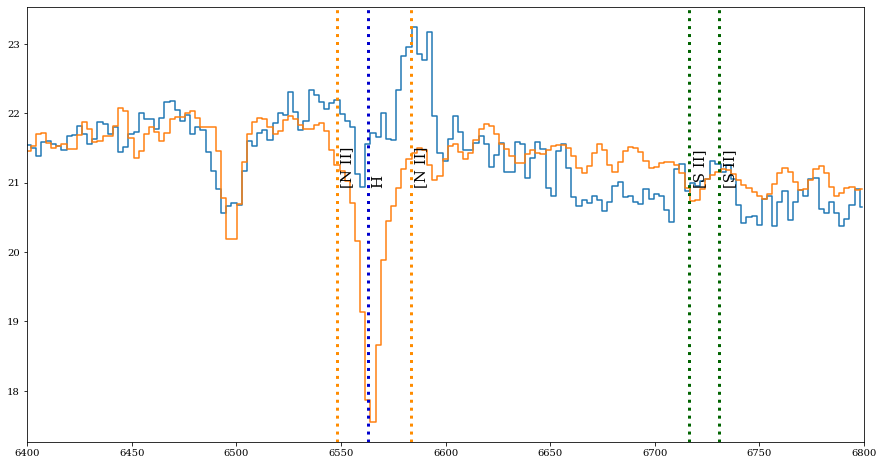

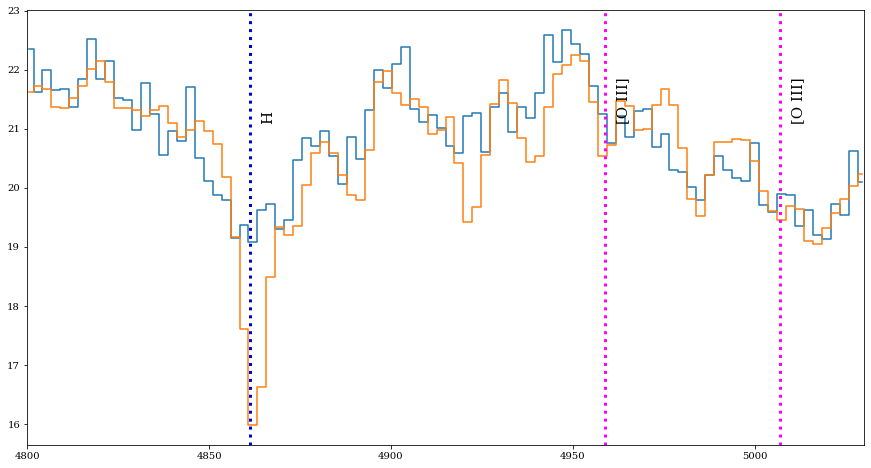

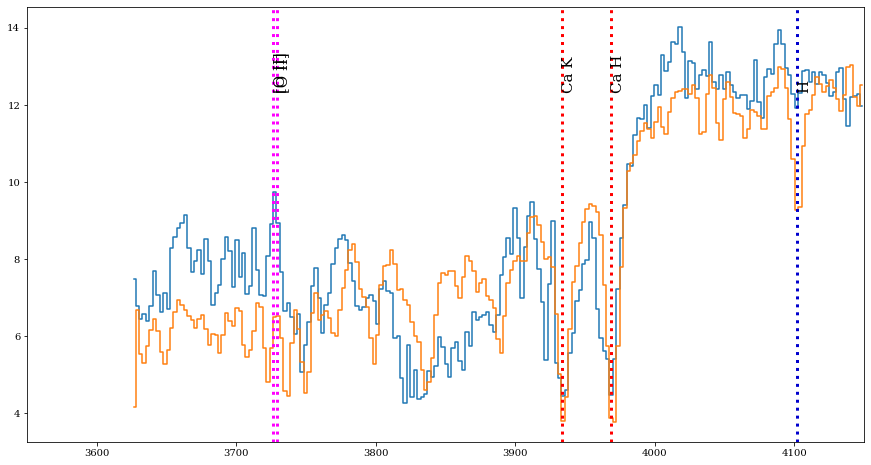

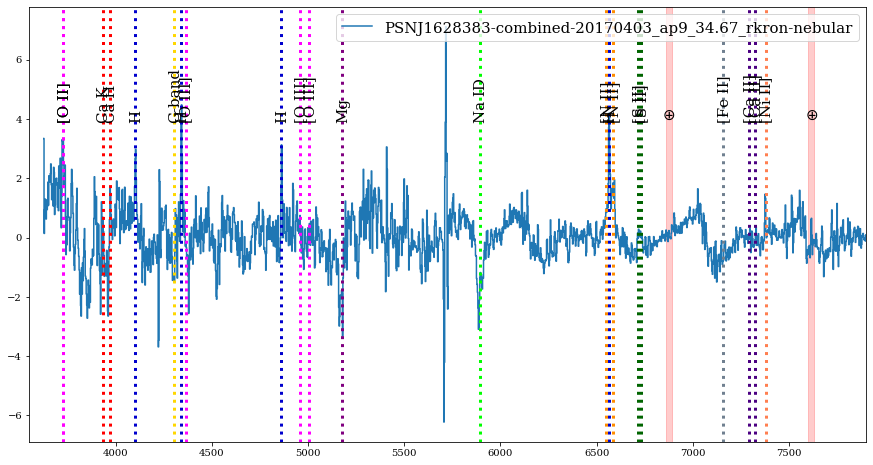

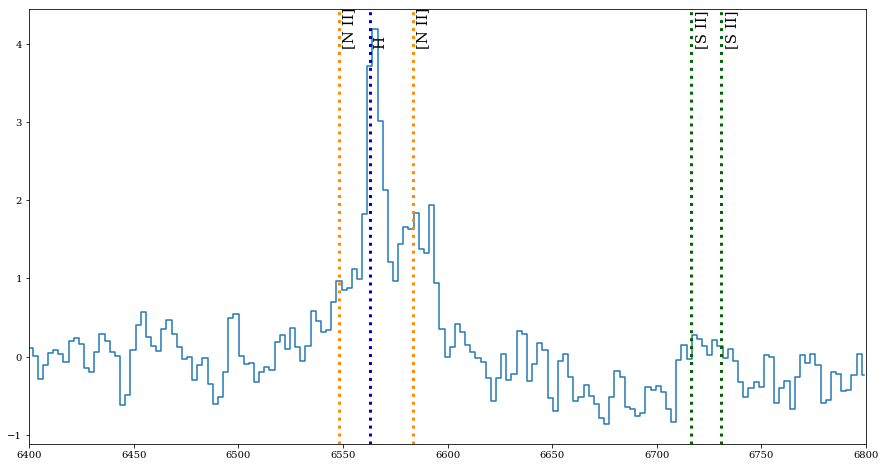

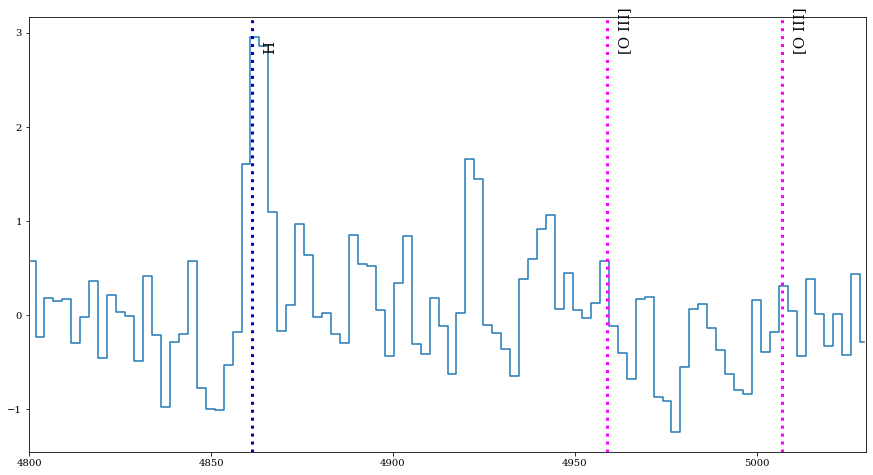

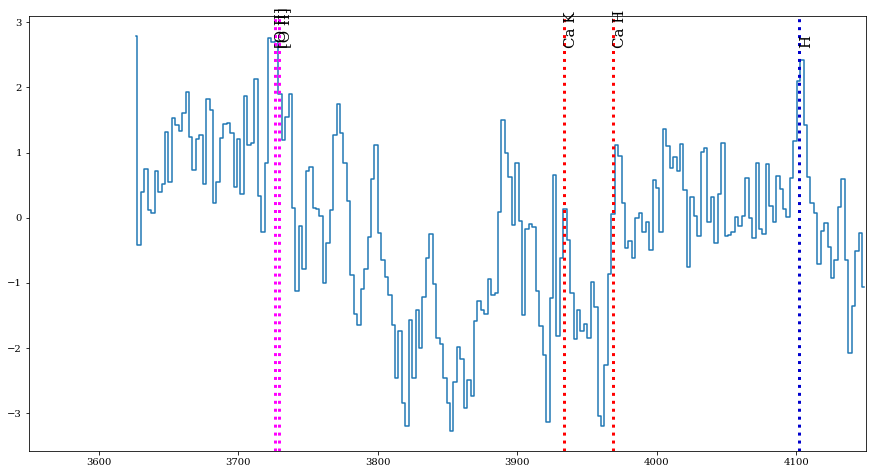

Median continuum:  20.25270306982017
Median residual:  0.04742622481974834
Residual fraction:  0.23417232088106377 %


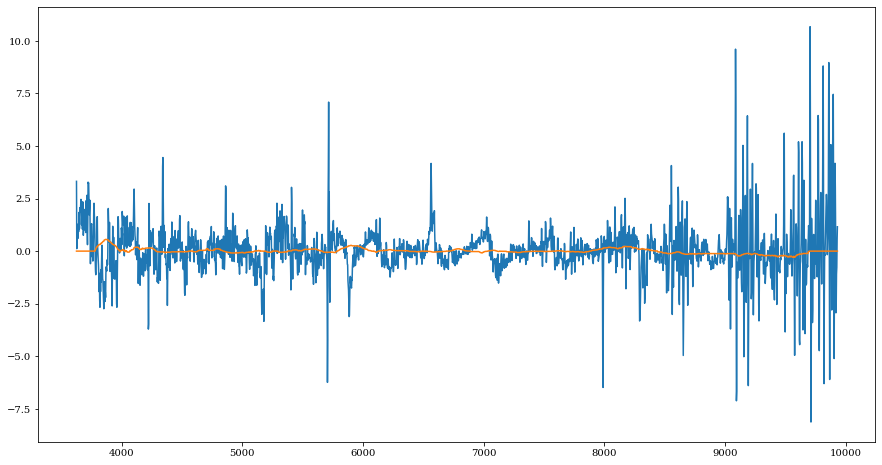

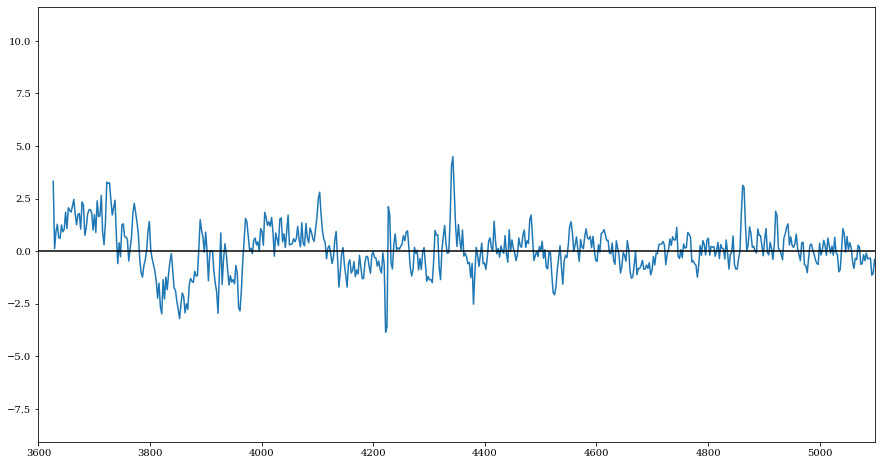

In [242]:
os.chdir('/Users/msiebert/Documents/UCSC/Research/firefly_release/')
from run import firefly
from run import read_firefly
save=True
for spec in spectra:
    print (spec.meta_dict['FILENAME'])
    wave, flux, model_flux, params = read_firefly.main('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
    hdu_fit = fits.open('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
    fit_head=hdu_fit[1].header
#     fit data=hdu_fit[1].data
    neb_emission = flux - model_flux
    
    meta_dict_spec = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0] +'-spec'}
    meta_dict_model = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-model'}
    db_spec = UCSC_db.spectrum(wavelength=wave, flux=flux, meta_dict=meta_dict_spec)
    db_spec_model = UCSC_db.spectrum(wavelength=wave, flux=model_flux, meta_dict=meta_dict_model)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False, cont_subtract=False)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [6400, 6800], legend = False, rescale=False, cont_subtract=False)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [4800, 5030], legend = False, rescale=False, cont_subtract=False)
    UCSC_db.host_line_plots([db_spec, db_spec_model], 0, region = [3550, 4150], legend = False, rescale=False, cont_subtract=False)
    
    meta_dict_neb = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-nebular'}
    db_spec_neb = UCSC_db.spectrum(wavelength=wave, flux=neb_emission, meta_dict=meta_dict_neb)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [6400, 6800], plot_region = [3550, 7900], legend = True, rescale=False)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [6400, 6800], legend = False, rescale=False)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [4800, 5030], legend = False, rescale=False)
    UCSC_db.host_line_plots([db_spec_neb], 0, region = [3550, 4150], legend = False, rescale=False)
    
    plt.figure(figsize=[15,8])
    flux_filt = scipy.signal.medfilt(db_spec_neb.flux, kernel_size=201)
    print ('Median continuum: ', np.median(db_spec.flux))
    print ('Median residual: ', np.median(np.absolute(flux_filt)))
    print ('Residual fraction: ', 100*np.median(np.absolute(flux_filt))/np.median(db_spec.flux), '%')
    plt.plot(db_spec_neb.wavelength, db_spec_neb.flux)
    plt.plot(db_spec_neb.wavelength, flux_filt)
    # plt.xlim(6000,8000)
#     plt.ylim(-.05,.05)
    plt.show()
    
    plt.figure(figsize=[15,8])
    final_neb_flux = db_spec_neb.flux - flux_filt
    plt.plot(db_spec_neb.wavelength, final_neb_flux)
    # plt.xlim(6000,8000)
#     plt.ylim(-.01,.105)
    plt.xlim(3600,5100)
    plt.axhline(y=0.0, color='k')
    plt.show()
    
#     txt_header = 'wavelength flux fluxerr\n'
#     txt_header = txt_header + 'SN: {}\n'.format(spec.meta_dict['OBJECT'])
#     txt_header = txt_header + 'Age: {}\n'.format(params[0])
#     txt_header = txt_header + 'Stellar Z: {}\n'.format(params[1])
#     txt_header = txt_header + 'log M/Msun: {}\n'.format(params[2])
#     txt_header = txt_header + 'E(B-V): {}\n'.format(params[3])
    
    if save:
        outhdu=fits.PrimaryHDU([db_spec_neb.wavelength,final_neb_flux])
        hdul=fits.HDUList(outhdu)
        hdul[0].header=fit_head
        hdul[0].verify('fix') 
        hdul[0].header.set('redshift', z)
        for key in spec.meta_dict.keys():
            hdul[0].header.set(key, spec.meta_dict.get(key,'N/A'))
    #     hdul[0].header.set('ebv_host', ebv_gal)
    #     hdul[0].header.set('h_ratio',h_ratio)
        hdul.writeto('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/analysis/host_nebular_emission_data/'+spec.meta_dict['FILENAME'].split('.fits')[0]+'-nebular.fits',overwrite=True)
        hdul.close()
#     np.savetxt('/Users/msiebert/Documents/UCSC/Research/Foundation_Hosts/analysis/host_nebular_emission_data/'+spec.meta_dict['FILENAME'].split('.fits')[0]+'-nebular.flm',
#            np.transpose([db_spec_neb.wavelength,final_neb_flux]), header=txt_header)

In [5]:
test_query = "SELECT * from SPECTRA where FILENAME like '%combined%'"
spectra = UCSC_db.grab_all_spec_data(test_query)

2017hmf-combined-20180711_ap3_1.5_kpc.fits
2017hmf-combined-20180711_ap2_1.0_kpc_SN_BAD.fits
PS15cge-combined-20180711_ap4_1.5_kpc_SN_BAD.fits
PS15cge-combined-20180711_ap11_1.5_arcsec.fits
2017hmf-combined-20180711_ap5_2.0_kpc.fits
ASASSN15pr-combined-20180711_ap8_1.0_arcsec_SN.fits
PS15cge-combined-20180711_ap1_1.0_kpc_BAD.fits
2018dfy-combined-20180711_ap1.fits
2017hmf-combined-20180711_ap1_1.0_kpc_BAD.fits
PS15cge-combined-20180711_ap12_1.5_arcsec_SN.fits
ASASSN15pr-combined-20180711_ap9_1.5_arcsec.fits
2017hmf-combined-20180711_ap12_4.25_rkron.fits
2018bdm-combined-20180711_ap1.fits
PS15cge-combined-20180711_ap3_1.5_kpc_BAD.fits
2017hmf-combined-20180711_ap4_1.5_kpc_SN.fits
PS15cge-combined-20180711_ap15_3.0_arcsec.fits
PS15cge-combined-20180711_ap16_3.0_arcsec_SN.fits
2017hmf-combined-20180711_ap10_2.0_arcsec.fits
PS15cge-combined-20180711_ap8_3.0_kpc_SN.fits
2017hmf-combined-20180711_ap6_3.0_kpc.fits
ASASSN15pr-combined-20180711_ap7_1.0_arcsec.fits
2018cdc-combined-20180711_ap1.

ASASSN15jt-combined-20170403_ap1_1.0_kpc.fits
age: 6.4 Gyr
[Z/H]: -0.01 dex
log M/Msun: 9.81
E(B-V): 0.13 mag


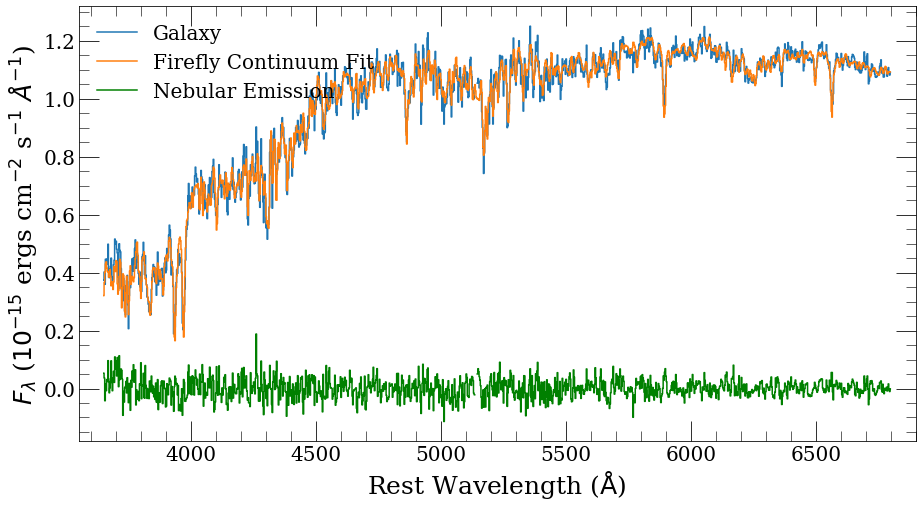

ASASSN15jt-combined-20170403_ap2_1.0_kpc_SN.fits
age: 8.25 Gyr
[Z/H]: -0.09 dex
log M/Msun: 9.68
E(B-V): 0.05 mag


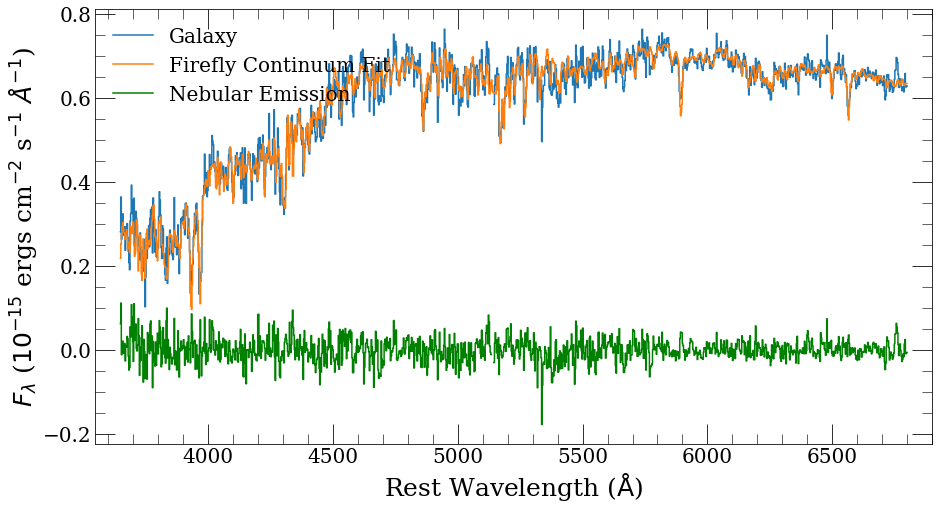

ASASSN15jt-combined-20170403_ap3_1.5_kpc.fits
age: 4.94 Gyr
[Z/H]: 0.01 dex
log M/Msun: 9.85
E(B-V): 0.13 mag


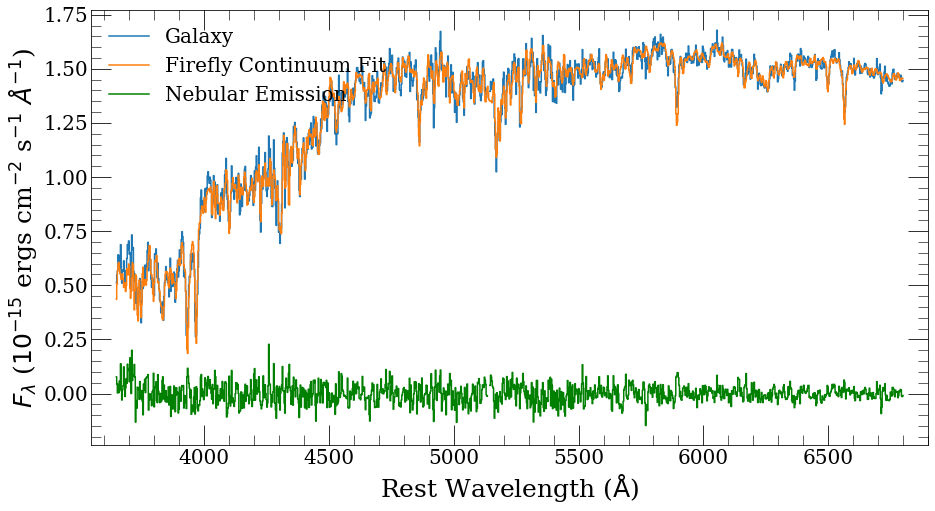

ASASSN15jt-combined-20170403_ap4_1.5_kpc_SN.fits
age: 5.15 Gyr
[Z/H]: 0.06 dex
log M/Msun: 9.71
E(B-V): 0.09 mag


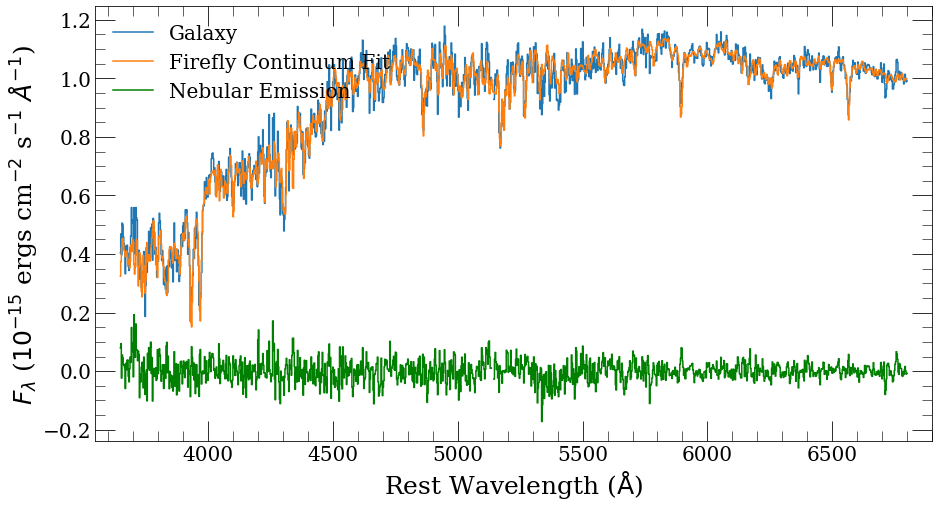

ASASSN15jt-combined-20170403_ap5_2.0_kpc.fits
age: 6.57 Gyr
[Z/H]: -0.02 dex
log M/Msun: 10.01
E(B-V): 0.09 mag


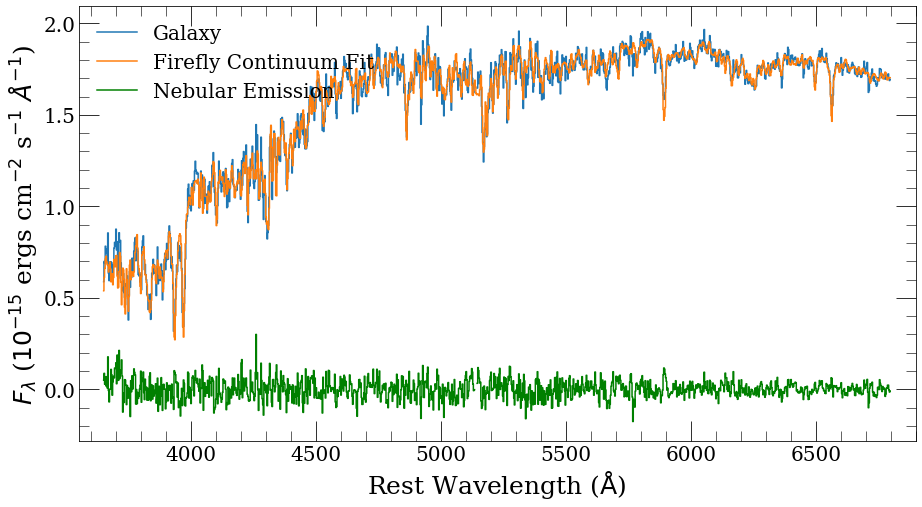

ASASSN15jt-combined-20170403_ap6_2.0_kpc_SN.fits
age: 6.74 Gyr
[Z/H]: -0.04 dex
log M/Msun: 9.91
E(B-V): 0.09 mag


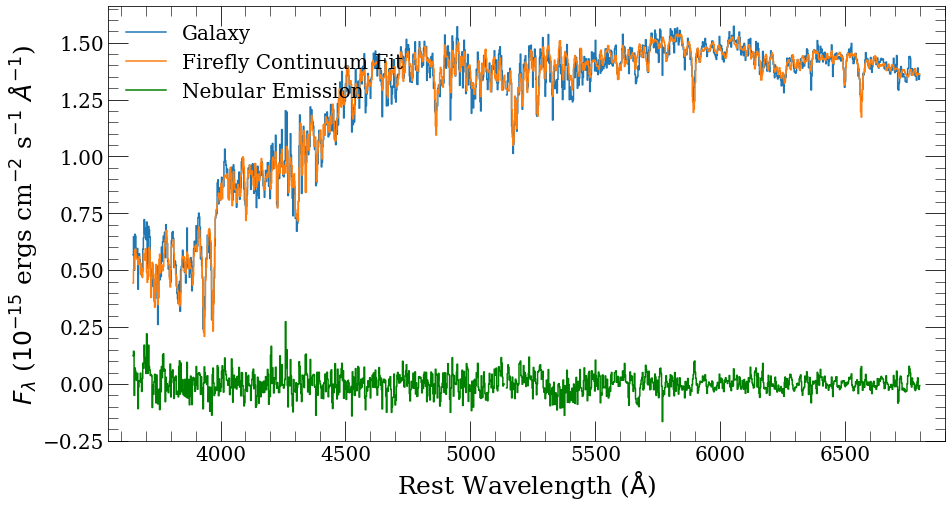

ASASSN15jt-combined-20170403_ap7_3.0_kpc.fits
age: 7.82 Gyr
[Z/H]: -0.07 dex
log M/Msun: 10.15
E(B-V): 0.07 mag


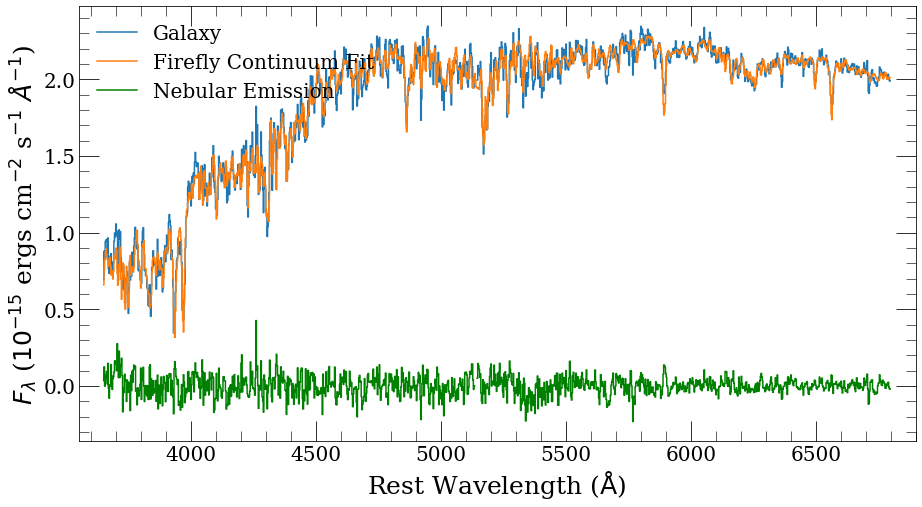

ASASSN15jt-combined-20170403_ap8_3.0_kpc_SN.fits
age: 3.35 Gyr
[Z/H]: -0.05 dex
log M/Msun: 9.82
E(B-V): 0.13 mag


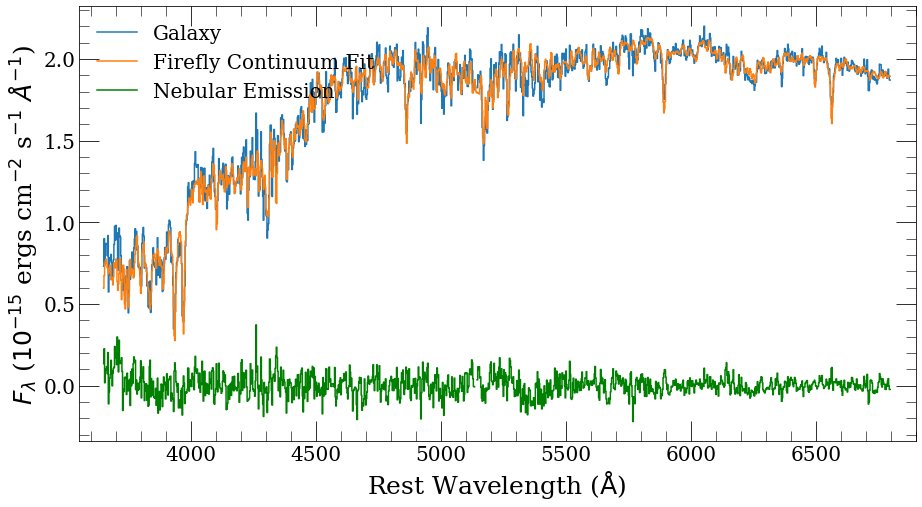

ASASSN15jt-combined-20170403_ap9_17.69_rkron.fits
age: 6.18 Gyr
[Z/H]: -0.09 dex
log M/Msun: 10.17
E(B-V): 0.05 mag


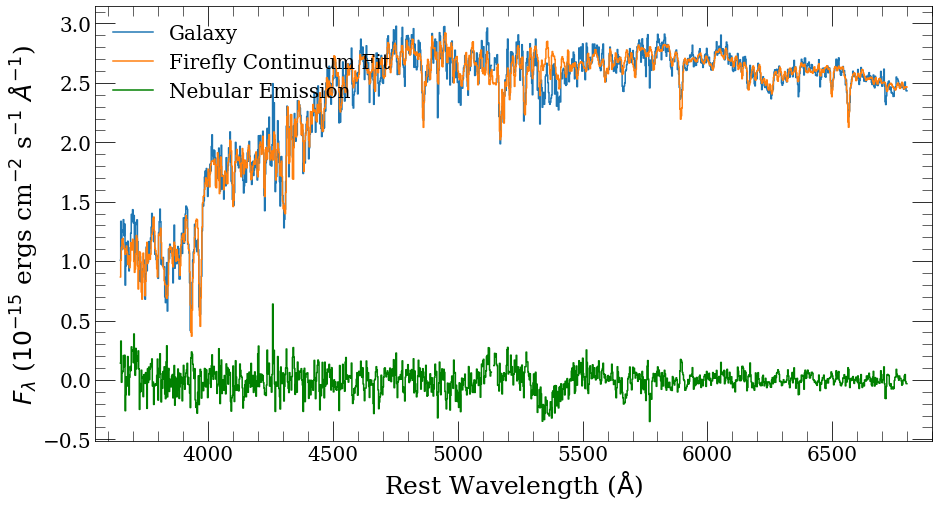

In [87]:
for spec in spectra:
    print (spec.meta_dict['FILENAME'])
    wave, flux, model_flux, params = read_firefly.main('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
    hdu_fit = fits.open('output/spFly-' + spec.meta_dict['FILENAME'].split('.fits')[0]+ '.fits')
    fit_head=hdu_fit[1].header
#     fit data=hdu_fit[1].data
    roi = (wave > 3650) & (wave < 6800)
    wave = wave[roi]
    flux = flux[roi]
    model_flux = model_flux[roi]
    
    nan_roi = (wave > 5135) & (wave < 5145)
    flux[nan_roi] = np.nan
    neb_emission = flux - model_flux
    
    
    
    meta_dict_spec = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0] +'-spec'}
    meta_dict_model = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-model'}
    db_spec = UCSC_db.spectrum(wavelength=wave, flux=flux, meta_dict=meta_dict_spec)
    db_spec_model = UCSC_db.spectrum(wavelength=wave, flux=model_flux, meta_dict=meta_dict_model)
    meta_dict_neb = {'FILENAME': spec.meta_dict['FILENAME'].split('.fits')[0]+ '-nebular'}
    db_spec_neb = UCSC_db.spectrum(wavelength=wave, flux=neb_emission, meta_dict=meta_dict_neb)
    UCSC_db.host_line_plots_fancy([db_spec, db_spec_model], 0, neb = db_spec_neb, region = [6400, 6900], plot_region = [3550, 6900], legend = False, rescale=False, cont_subtract=False)
#     UCSC_db.host_line_plots_fancy([db_spec, db_spec_model], 0, neb = db_spec_neb, region = [5100, 5200], plot_region = [6500, 6800], legend = False, rescale=False, cont_subtract=False)
    
    

In [99]:
print (hdul[0].header)

SIMPLE  =                    T                                                  BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 2558 / length of dimension 1                          NAXIS2  =                    2 / length of dimension 2                          XTENSION= 'BINTABLE'           / binary table extension                         PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    4 / number of table fields                         TTYPE1  = 'wavelength'                                                          TFORM1  = 'D       '                                                            TUNIT1  = 'Angstrom'                                                            TTYPE2  = 'original_data'               